In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-09 17:31:11,540 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:31:11,541 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:31:11,542 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:31:11,547 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-09 17:31:11,548 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-09 17:31:11,561 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-09 17:31:11,828 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-09 17:31:11,861 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-09 17:31:11,862 - settings - Setting database.user to celiib
INFO - 2021-01-09 17:31:11,863 - settings - Setting database.password to newceliipass
INFO - 2021-01-09 17:31:11,865 - settings - Setting enable_python_native_blobs to True


Sleeping 20 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-09 17:31:12,184 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 3375


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,=BLOB=,1400375,2824255,0,0,0,1,8,427,292,10485954.599357573,4727993.083156605,13445.294,87.88,87.88,580.726,553.126,2350,0.0002241093052361655,5.503512880562061,4549944.99,150,0.0005164897609014828,15.667,86456604345.94843,20733767.594250996,8244.991290658958,19001.6812370183,576377362.3063228,6052.7497
864691135012398582,0,0.25,29.00,=BLOB=,1376990,2794781,4,1,4,2,8,330,131,13929332.12258168,4744489.087608502,25208.79,181.248,177.914,503.855,470.905,5197,0.00037309757239364195,15.748484848484848,8746791.671,174,0.0005941607157777246,29.868,251421367265.7805,24448738.045176186,18049.7790599871,28744.410147479375,1444950386.5849454,5996.9728
864691135012471798,0,0.25,29.00,=BLOB=,879119,1793791,2,1,2,2,8,287,83,10504921.973170185,3098908.649973214,20600.38,101.514,101.514,460.035,401.749,2708,0.00025778392328056266,9.435540069686411,6126023.074,125,0.00044204861249923526,21.664,133822127394.86624,32030964.53258705,12738.99299172817,21844.8617934256,1070577019.15893,10541.8198
864691135012571126,0,0.25,29.00,=BLOB=,1405952,2834699,4,4,0,1,8,434,190,14952565.529701162,5950582.376110614,22558.465,138.374,138.374,462.864,403.433,5410,0.000361810820307311,12.465437788018432,8599310.865,213,0.0006291201800855004,25.399,343080427437.90247,35381025.859495796,22944.586115099886,39896.26992486943,1610706232.1028285,18348.506
864691135012905110,0,0.25,29.00,=BLOB=,816541,1676641,1,1,0,1,9,266,119,10125935.219943585,4352752.241138446,24325.062,90.366,90.366,387.869,355.32,2433,0.00024027410280169214,9.146616541353383,5469864.913,104,0.0004448007471295297,23.394,145698898455.88928,31207278.626825333,14388.6856168038,26636.65387962558,1400950946.6912432,11106.3706
864691135065018692,0,0.25,29.00,=BLOB=,927599,1896021,1,1,1,2,18,276,61,10166672.817443343,2066816.1113789165,17200.227,109.19,109.19,532.523,523.56,2023,0.00019898348617347682,7.329710144927536,5487593.34,122,0.000368649765873504,16.582,124429383137.71652,33444570.407502748,12238.948313968396,22674.67274419364,1019912976.53866,4207.7487
864691135065024068,0,0.25,29.00,=BLOB=,1683573,3378174,2,2,0,1,11,336,99,15436829.265081966,4735182.057076573,30246.518,312.805,283.607,621

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,502a39f8507e8566285266a8332bb817,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,20388,26929,2021-01-09 11:30:56
__neuron_split_suggestions,7b5265ddb05b48d5f7a19ed80bbec5f6,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,20451,26930,2021-01-09 11:31:04


INFO - 2021-01-09 17:31:12,345 - autopopulate - Found 88 keys to populate
INFO - 2021-01-09 17:31:12,359 - connection - Transaction started
INFO - 2021-01-09 17:31:12,361 - autopopulate - Populating: {'segment_id': 864691135012905110, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00')}


Populate Started


----- Working on 864691135012905110-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[55 62]
 [55 67]
 [55 73]
 [62 67]
 [62 73]
 [67 73]]


---- working on disconnecting 55 and 62
---- This disconnects S0_1 from S0_9  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [55, 53, 34, 32, 37, 42, 41, 56, 57, 58, 62]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 8 32 33 34 35 36 37 38 40 41 42 43 49 50 53 56 57 58 77]
Short segments to combine = [42]


-------- Removing Segments -------------
curr_short_seg_revised = 42
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[695514.64553843 776830.75

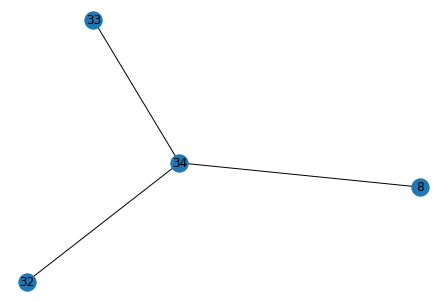

match_branches = [[8, 34], [32, 33]]
edges_to_delete (resolve crossover) = [[8, 32], [8, 33], [32, 34], [33, 34]]
edges_to_create (resolve crossover) = [[8, 34], [32, 33]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[8, 32], [8, 33], [32, 34], [33, 34]]
edges_to_create = [[8, 34], [32, 33]]
Number of connected components = 3
Comp 0 = {32, 33, 35, 36, 37, 38, 40, 41, 43, 77, 50, 56, 57, 58, 62}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 39, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 59, 60, 61, 63, 64, 65, 66.0, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118}
Comp 2 = {42}
curr_limb_copy.deleted_edges = [[8, 32], [8, 33], [32, 34], [33, 34]]
curr_limb_copy.created_edges = [[8, 34], [32, 

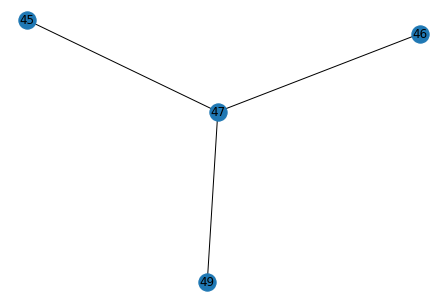

match_branches = [[45, 49]]
edges_to_delete (resolve crossover) = [[45, 46], [45, 47], [46, 47], [46, 49], [47, 49]]
edges_to_create (resolve crossover) = [[45, 49]]
curr_limb.deleted_edges 5 =[[8, 32], [8, 33], [32, 34], [33, 34]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[45, 46], [45, 47], [46, 47], [46, 49], [47, 49]]
edges_to_create = [[45, 49]]
Number of connected components = 9
Comp 0 = {32, 33, 35, 36, 37, 38, 40, 41, 43, 77, 50, 56, 57, 58, 62}
Comp 1 = {8, 34, 45, 49, 53, 54, 55, 72, 74, 79, 81, 84, 85, 87, 88, 89, 91, 92, 93, 97, 98, 99, 100, 106, 109, 112, 113, 114, 115}
Comp 2 = {46}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 39, 44, 47, 51, 52, 59, 60, 61, 63, 64, 65, 66.0, 67, 70, 73, 75, 76, 78, 80, 82, 83, 86, 90, 94, 95, 96, 101, 102, 103, 104, 105, 107, 108, 110, 111, 116, 117, 118}
Comp 4 = {42}
Comp 5 = {48}
Comp 6 = {68}
Comp 7 = {69}
Comp 8 = {71}
curr_limb_copy.deleted_

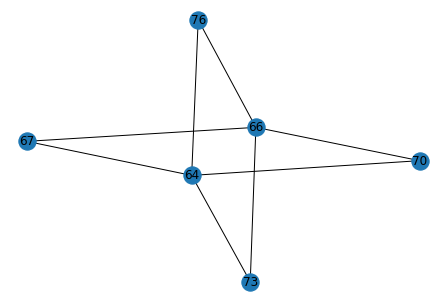

match_branches = [[66, 67], [64, 73]]
edges_to_delete (resolve crossover) = [[64, 66], [64, 67], [64, 70], [64, 76], [66, 70], [66, 73], [66, 76], [67, 70], [67, 73], [67, 76], [70, 73], [70, 76], [73, 76]]
edges_to_create (resolve crossover) = [[66, 67], [64, 73]]
curr_limb.deleted_edges 5 =[[8, 32], [8, 33], [32, 34], [33, 34], [45, 46], [45, 47], [46, 47], [46, 49], [47, 49]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[64, 66], [64, 67], [64, 70], [64, 76], [66, 70], [66, 73], [66, 76], [67, 70], [67, 73], [67, 76], [70, 73], [70, 76], [73, 76]]
edges_to_create = [[66, 67], [64, 73]]
Number of connected components = 11
Comp 0 = {32, 33, 35, 36, 37, 38, 40, 41, 43, 77, 50, 56, 57, 58, 62}
Comp 1 = {8, 34, 45, 49, 53, 54, 55, 72, 74, 79, 81, 84, 85, 87, 88, 89, 91, 92, 93, 97, 98, 99, 100, 106, 109, 112, 113, 114, 115}
Comp 2 = {46}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 39, 44, 47, 51, 52

  Edge: [67. 66.]: curr_angle = 22.92
  Edge: [66. 63.]: curr_angle = 52.79
  Edge: [63. 64.]: curr_angle = 47.17
  Edge: [64. 73.]: curr_angle = 23.25

Total time for doubling_back = 0.10421562194824219

Attempting the width jump check (attempting from both sides)
  Edge: [67. 66.]: jump = -61.26
  Edge: [66. 63.]: jump = 226.29
Adding error edge [66. 63.] because width jump was 226.2914881751447
  Edge: [63. 64.]: jump = 18.32
  Edge: [64. 73.]: jump = 12.87
Total time for width = 0.07259941101074219
Path starting at 67.0 had err_edges: [[66.0, 63.0]]
  Edge: [73. 64.]: jump = -12.87
  Edge: [64. 63.]: jump = -18.32
  Edge: [63. 66.]: jump = -226.29
  Edge: [66. 67.]: jump = 61.26
Total time for width = 0.07300615310668945
Path starting at 73.0 had err_edges: []
first_error_sizes = [226.2914881751447, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [63, 64, 66]
63 = red
64 = aqua
66 = purple
Angle between 63 and 64 = 42.2 
Angle between 63 and 66 = 2

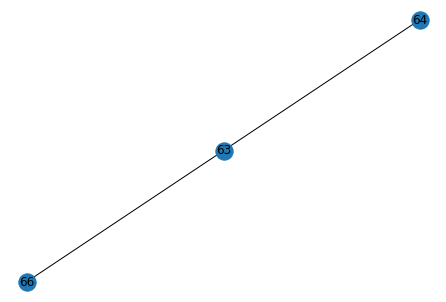

match_branches = [[63, 66]]
edges_to_delete (resolve crossover) = [[63, 64], [64, 66]]
edges_to_create (resolve crossover) = [[63, 66]]
Rejecting creating edge [63, 66] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([63., 64.]), array([63., 66.]), array([64., 66.])]
edges_to_create = []
Number of connected components = 13
Comp 0 = {32, 33, 35, 36, 37, 38, 40, 41, 43, 77, 50, 56, 57, 58, 62}
Comp 1 = {8, 34, 45, 49, 53, 54, 55, 72, 74, 79, 81, 84, 85, 87, 88, 89, 91, 92, 93, 97, 98, 99, 100, 106, 109, 112, 113, 114, 115}
Comp 2 = {46}
Comp 3 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 39, 44, 47, 51, 52, 59, 60, 61, 63, 65, 75, 78, 80, 82, 83, 86, 90, 94, 95, 96, 103, 104, 105, 107, 108, 110, 111, 116, 117, 118}
Comp 4 = {64, 73}
Comp 5 = {66.0, 67}
Comp 6 = {70}
Comp 7 = {76, 101, 102}
Comp 8 = {42}
Comp 9 = {48}
Comp 10 = {68}
Comp 11 = {69}
Comp 12 = {71}
cur

  Edge: [37 30]: curr_angle = 21.62
  Edge: [30 24]: curr_angle = 29.65
  Edge: [24 25]: curr_angle = 35.98
  Edge: [25 26]: curr_angle = 26.48
  Edge: [26 29]: curr_angle = 5.45
  Edge: [29 31]: curr_angle = 45.76
  Edge: [31 43]: curr_angle = 60.61
  Edge: [43 34]: curr_angle = 19.09
  Edge: [34 48]: curr_angle = 38.0
  Edge: [48 39]: curr_angle = 48.85
  Edge: [39 35]: curr_angle = 20.07
  Edge: [35 32]: curr_angle = 23.57
  Edge: [32 33]: curr_angle = 29.81
  Edge: [33 42]: curr_angle = 17.62

Total time for doubling_back = 0.9083096981048584

Attempting the width jump check (attempting from both sides)
  Edge: [37 30]: jump = -132.85
  Edge: [30 24]: jump = -194.25
  Edge: [24 25]: jump = -161.14
  Edge: [25 26]: jump = -37.53
  Edge: [26 29]: jump = -214.47
  Edge: [29 31]: jump = -270.6
  Edge: [31 43]: jump = 16.57
  Edge: [43 34]: jump = 8.07
  Edge: [34 48]: jump = 74.54
  Edge: [48 39]: jump = 149.39
  Edge: [39 35]: jump = 318.45
Adding error edge [39 35] because width jump

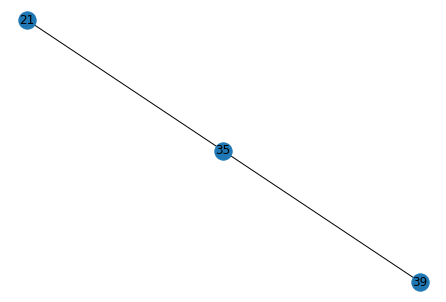

match_branches = [[21, 35]]
edges_to_delete (resolve crossover) = [[21, 39], [35, 39]]
edges_to_create (resolve crossover) = [[21, 35]]
edges_to_delete (cut_limb_network) = [array([21, 39]), array([35, 39])]
edges_to_create = [[21, 35]]
Number of connected components = 2
Comp 0 = {2, 3, 7, 8, 10, 12, 13, 14, 15, 16, 19, 21, 27, 32, 33, 35, 40, 41, 42, 44, 45, 47, 49, 50, 51, 55, 56, 57}
Comp 1 = {0, 1, 4, 5, 6, 9, 11, 17, 18, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 34, 36, 37, 38, 39, 43, 46, 48, 52, 53, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}
curr_limb_copy.deleted_edges = [array([21, 39]), array([35, 39])]
curr_limb_copy.created_edges = [[21, 35]]
After get best cut: cut_edges = [array([21, 39]), array([35, 39])], added_edges = [[21, 35]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER D

  Edge: [37 30]: curr_angle = 21.62
  Edge: [30 24]: curr_angle = 29.65
  Edge: [24 25]: curr_angle = 35.98
  Edge: [25 26]: curr_angle = 26.48
  Edge: [26 29]: curr_angle = 5.45
  Edge: [29 31]: curr_angle = 45.76
  Edge: [31 43]: curr_angle = 60.61
  Edge: [43 36]: curr_angle = 75.67
  Edge: [36 61]: curr_angle = 16.55
  Edge: [61 59]: curr_angle = 9.54
  Edge: [59 68]: curr_angle = 15.64
  Edge: [68 63]: curr_angle = 24.03
  Edge: [63 64]: curr_angle = 37.88
  Edge: [64 69]: curr_angle = 22.82

Total time for doubling_back = 1.4693074226379395

Attempting the width jump check (attempting from both sides)
  Edge: [37 30]: jump = -132.85
  Edge: [30 24]: jump = -194.25
  Edge: [24 25]: jump = -161.14
  Edge: [25 26]: jump = -37.53
  Edge: [26 29]: jump = -214.47
  Edge: [29 31]: jump = -270.6
  Edge: [31 43]: jump = 16.57
  Edge: [43 36]: jump = -191.69
  Edge: [36 61]: jump = 40.54
  Edge: [61 59]: jump = 203.73
Adding error edge [61 59] because width jump was 203.73174768280194
  Ed

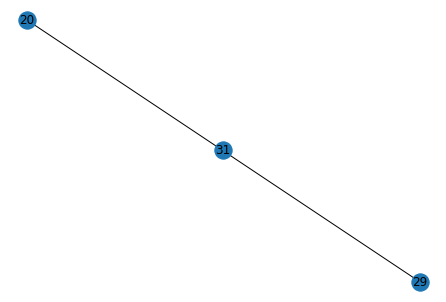

match_branches = [[20, 29]]
edges_to_delete (resolve crossover) = [[20, 31], [29, 31]]
edges_to_create (resolve crossover) = [[20, 29]]
edges_to_delete (cut_limb_network) = [array([20, 31]), array([29, 31])]
edges_to_create = [[20, 29]]
Number of connected components = 3
Comp 0 = {2, 3, 7, 8, 10, 12, 13, 14, 15, 16, 19, 21, 27, 32, 33, 35, 40, 41, 42, 44, 45, 47, 49, 50, 51, 55, 56, 57}
Comp 1 = {6, 22, 31, 34, 36, 39, 43, 46, 48, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}
Comp 2 = {0, 1, 4, 5, 37, 38, 9, 11, 17, 18, 20, 53, 52, 23, 24, 25, 26, 28, 29, 30}
curr_limb_copy.deleted_edges = [array([21, 39]), array([35, 39]), array([20, 31]), array([29, 31])]
curr_limb_copy.created_edges = [[21, 35], [20, 29]]
After get best cut: cut_edges = [array([20, 31]), array([29, 31])], added_edges = [[20, 29]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3


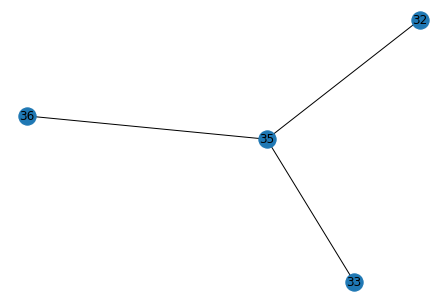

match_branches = [[33, 35], [32, 36]]
edges_to_delete (resolve crossover) = [[32, 33], [32, 35], [33, 36], [35, 36]]
edges_to_create (resolve crossover) = [[33, 35], [32, 36]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 33], [32, 35], [33, 36], [35, 36]]
edges_to_create = [[33, 35], [32, 36]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 45}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36]]
curr_limb_copy.created_edges = [[33, 35], [32, 36]]
After get best cut: cut_edges = [[32, 33], [32, 35], [33, 36], [35, 36]], added_edges = [[33, 35], [32, 36]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of grap

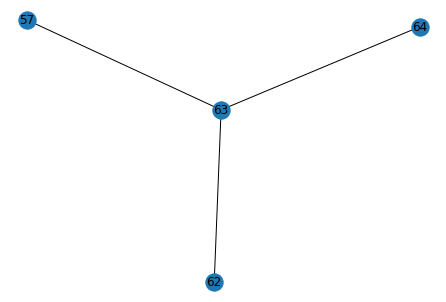

match_branches = [[62, 63], [57, 64]]
edges_to_delete (resolve crossover) = [[57, 62], [57, 63], [62, 64], [63, 64]]
edges_to_create (resolve crossover) = [[62, 63], [57, 64]]
curr_limb.deleted_edges 5 =[[32, 33], [32, 35], [33, 36], [35, 36]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[57, 62], [57, 63], [62, 64], [63, 64]]
edges_to_create = [[62, 63], [57, 64]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 39, 40, 43, 44, 48, 49, 51, 54, 58, 59, 60, 61, 62, 63, 65, 66}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 45}
Comp 2 = {64, 67, 41, 42, 46, 47, 50, 52, 53, 55, 56, 57}
Comp 3 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64]]
curr_limb_copy.created_edges = [[33, 35], [32, 36], [62, 63], [57, 64]]
After get best cut: cut_edges = [[57, 62], [57, 63], [62, 64], [63, 64]], added_edges = [[62, 63], [57

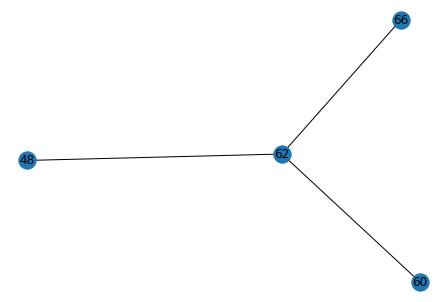

match_branches = [[60, 66]]
edges_to_delete (resolve crossover) = [[48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
edges_to_create (resolve crossover) = [[60, 66]]
curr_limb.deleted_edges 5 =[[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
edges_to_create = [[60, 66]]
Number of connected components = 6
Comp 0 = {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 33, 35, 37, 38, 39, 40, 43, 44, 49, 51, 58, 59, 62, 63, 65}
Comp 1 = {2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 36, 45}
Comp 2 = {64, 67, 41, 42, 46, 47, 50, 52, 53, 55, 56, 57}
Comp 3 = {48}
Comp 4 = {66, 60, 61, 54}
Comp 5 = {34}
curr_limb_copy.deleted_edges = [[32, 33], [32, 35], [33, 36], [35, 36], [57, 62], [57, 63], [62, 64], [63, 64], [48, 60], [48, 62], [48, 66], [60, 62], [62, 66]]
curr_limb_copy.created_edges = [[33, 35], [32, 36], [62, 63], [57, 64], [6

  Edge: [11  7]: curr_angle = 124.49
  Edge: [7 8]: curr_angle = 79.75
  Edge: [ 8 17]: curr_angle = 82.34
  Edge: [17 14]: curr_angle = 13.35
  Edge: [14 15]: curr_angle = 42.82

Total time for doubling_back = 0.314913272857666
There were 1 edges that passed doubling back threshold of 100
Winning edge [11  7] had a doubling back of 124.4947667302454
***inside resolve crossover!!!!****
coordinate_branches = [5, 7, 11]
5 = red
7 = aqua
11 = purple
Angle between 5 and 7 = 68.94 
Angle between 5 and 11 = 30.67 
Angle between 7 and 11 = 118.91 
Final Matches = [[5, 11]]
matched_branches_revised = [[5, 11]]
Original graph


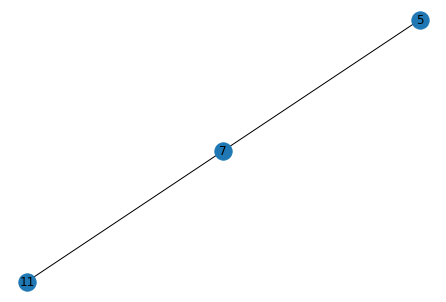

match_branches = [[5, 11]]
edges_to_delete (resolve crossover) = [[5, 7], [7, 11]]
edges_to_create (resolve crossover) = [[5, 11]]
edges_to_delete (cut_limb_network) = [array([5, 7]), array([ 7, 11])]
edges_to_create = [[5, 11]]
Number of connected components = 2
Comp 0 = {11, 5}
Comp 1 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18}
curr_limb_copy.deleted_edges = [array([5, 7]), array([ 7, 11])]
curr_limb_copy.created_edges = [[5, 11]]
After get best cut: cut_edges = [array([5, 7]), array([ 7, 11])], added_edges = [[5, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([11,  5]), array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18])]


 ------ Total time for Splitting 8646

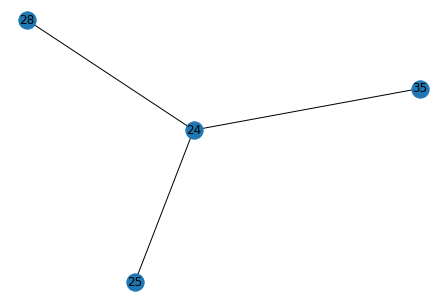

match_branches = [[24, 28], [25, 35]]
edges_to_delete (resolve crossover) = [[24, 25], [24, 35], [25, 28], [28, 35]]
edges_to_create (resolve crossover) = [[24, 28], [25, 35]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 44 because skeletal distance was 162.01734452177072 and threshold was 2500
skip_nodes = [44]
edges_to_delete (cut_limb_network) = [[24, 25], [24, 35], [25, 28], [28, 35]]
edges_to_create = [[24, 28], [25, 35]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103.0, 104, 105, 106, 107, 108, 109}
Comp 1 = {31}
Comp 2 = {53}
curr_limb_copy.deleted_edges = [[24, 25], [24, 35], [25, 28]

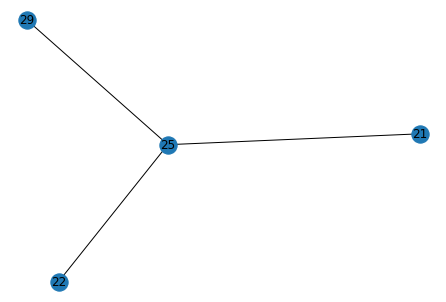

match_branches = [[22, 29]]
edges_to_delete (resolve crossover) = [[21, 22], [21, 25], [21, 29], [22, 25], [25, 29]]
edges_to_create (resolve crossover) = [[22, 29]]
curr_limb.deleted_edges 5 =[[24, 25], [24, 35], [25, 28], [28, 35]]
Skipping endnode 44 because skeletal distance was 162.01734452177072 and threshold was 2500
skip_nodes = [44]
edges_to_delete (cut_limb_network) = [[21, 22], [21, 25], [21, 29], [22, 25], [25, 29]]
edges_to_create = [[22, 29]]
Number of connected components = 6
Comp 0 = {0, 3, 4, 6, 8, 9, 10, 11, 13, 15, 17, 20, 25, 35, 36, 38, 41, 43, 47, 48, 50, 51, 54, 55, 56, 57, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 104, 105, 106, 107, 108}
Comp 1 = {1, 2, 5, 12, 16, 18, 19, 22, 24, 26, 27, 28, 29, 30, 32, 33, 34, 37, 39, 40, 42, 44, 45, 46, 49, 52, 58, 59, 60, 61, 64, 98, 99, 100, 101, 102, 103.0, 109}
Comp 2 = {21, 14, 7}
Comp 3 = {23}
Comp 4 = {31}
Comp 5 = {53}
cu

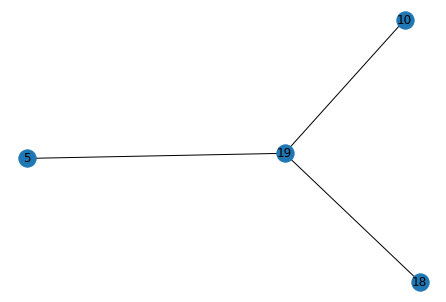

match_branches = [[10, 18], [5, 19]]
edges_to_delete (resolve crossover) = [[5, 10], [5, 18], [10, 19], [18, 19]]
edges_to_create (resolve crossover) = [[10, 18], [5, 19]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[5, 10], [5, 18], [10, 19], [18, 19]]
edges_to_create = [[10, 18], [5, 19]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 7, 8, 9, 10, 11.0, 12, 13, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 39, 48, 49, 50, 52, 53, 54, 59, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88}
Comp 1 = {3, 5, 6, 14, 15, 16, 19, 21, 28, 29, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 51, 55, 56, 57, 58, 60, 65, 73, 74, 75, 86, 87}
Comp 2 = {17}
Comp 3 = {61}
curr_limb_copy.deleted_edges = [[5, 10], [5, 18], [10, 19], [18, 19]]
curr_limb_copy.created_edges = [[10, 18], [5, 19]]
After get best cut: cut_edges = [[5, 10], [5, 18], [10, 19], [18, 19]], added_edges = [[10, 18], [5, 19]]
total_soma_paths_t

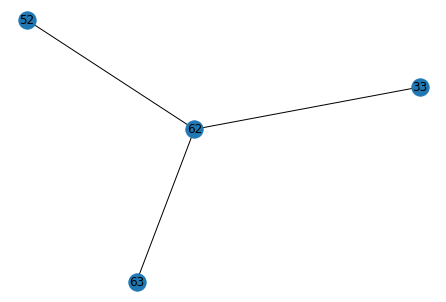

match_branches = [[52, 62]]
edges_to_delete (resolve crossover) = [[33, 52], [33, 62], [33, 63], [52, 63], [62, 63]]
edges_to_create (resolve crossover) = [[52, 62]]
curr_limb.deleted_edges 5 =[[5, 10], [5, 18], [10, 19], [18, 19]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[33, 52], [33, 62], [33, 63], [52, 63], [62, 63]]
edges_to_create = [[52, 62]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 4, 7, 8, 9, 10, 11.0, 12, 13, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 34, 35, 36, 39, 48, 49, 50, 52, 53, 54, 59, 62, 64, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88}
Comp 1 = {33}
Comp 2 = {63}
Comp 3 = {3, 5, 6, 14, 15, 16, 19, 21, 28, 29, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 51, 55, 56, 57, 58, 60, 65, 73, 74, 75, 86, 87}
Comp 4 = {17}
Comp 5 = {61}
curr_limb_copy.deleted_edges = [[5, 10], [5, 18], [10, 19], [18, 19], [33, 52], [33, 62], [33, 63], [52, 63], [62, 63]]
curr_limb_copy.created_edges = [[10, 18], [5, 19], [52, 62]]
After get b

  Edge: [64 62]: curr_angle = 26.67
  Edge: [62 52]: curr_angle = 10.84
  Edge: [52 49]: curr_angle = 35.74
  Edge: [49 48]: curr_angle = 9.41
  Edge: [48 50]: curr_angle = 7.97
  Edge: [50 53]: curr_angle = 24.8
  Edge: [53 59]: curr_angle = 40.81
  Edge: [59 76]: curr_angle = 40.41
  Edge: [76 77]: curr_angle = 20.12
  Edge: [77 78]: curr_angle = 40.41
  Edge: [78 85]: curr_angle = 31.74
  Edge: [85 88]: curr_angle = 25.9

Total time for doubling_back = 2.0725200176239014

Attempting the width jump check (attempting from both sides)
  Edge: [64 62]: jump = -200.76
  Edge: [62 52]: jump = -0.78
  Edge: [52 49]: jump = -145.79
  Edge: [49 48]: jump = 11.33
  Edge: [48 50]: jump = -109.15
  Edge: [50 53]: jump = -146.25
  Edge: [53 59]: jump = -313.59
  Edge: [59 76]: jump = -55.89
  Edge: [76 77]: jump = 314.42
Adding error edge [76 77] because width jump was 314.4184673213273
  Edge: [77 78]: jump = 152.65
  Edge: [78 85]: jump = 90.48
  Edge: [85 88]: jump = 184.87
Total time for wid

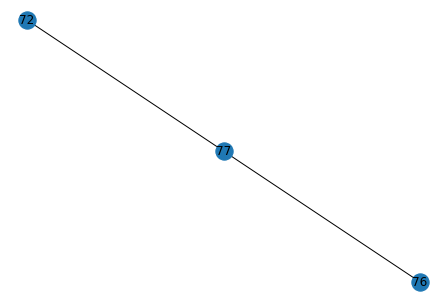

match_branches = [[72, 77]]
edges_to_delete (resolve crossover) = [[72, 76], [76, 77]]
edges_to_create (resolve crossover) = [[72, 77]]
edges_to_delete (cut_limb_network) = [array([72, 76]), array([76, 77])]
edges_to_create = [[72, 77]]
Number of connected components = 7
Comp 0 = {0, 1, 4, 7, 8, 9, 10, 11.0, 12, 13, 18, 20, 22, 23, 25, 26, 27, 30, 31, 32, 34, 35, 36, 39, 48, 49, 50, 52, 53, 59, 62, 64, 66, 67, 68, 76, 79, 80, 81, 83, 84}
Comp 1 = {33}
Comp 2 = {63}
Comp 3 = {3, 5, 6, 14, 15, 16, 19, 21, 28, 29, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 51, 55, 56, 57, 58, 60, 65, 73, 74, 75, 86, 87}
Comp 4 = {2, 69, 70, 71, 72, 77, 78, 82, 85, 54, 88, 24}
Comp 5 = {17}
Comp 6 = {61}
curr_limb_copy.deleted_edges = [[5, 10], [5, 18], [10, 19], [18, 19], [33, 52], [33, 62], [33, 63], [52, 63], [62, 63], array([72, 76]), array([76, 77])]
curr_limb_copy.created_edges = [[10, 18], [5, 19], [52, 62], [72, 77]]
After get best cut: cut_edges = [array([72, 76]), array([76, 77])], added_edges = [[7

  Edge: [16 14]: curr_angle = 45.15
  Edge: [14 13]: curr_angle = 26.99
  Edge: [13 19]: curr_angle = 22.01
  Edge: [19 21]: curr_angle = 31.65
  Edge: [21 22]: curr_angle = 31.81
  Edge: [22 24]: curr_angle = 18.89
  Edge: [24 25]: curr_angle = 33.31

Total time for doubling_back = 0.5869543552398682

Attempting the width jump check (attempting from both sides)
  Edge: [16 14]: jump = -154.32
  Edge: [14 13]: jump = 190.41
  Edge: [13 19]: jump = -104.33
  Edge: [19 21]: jump = 172.08
  Edge: [21 22]: jump = 55.2
  Edge: [22 24]: jump = 25.11
  Edge: [24 25]: jump = 153.28
Total time for width = 0.5369858741760254
Path starting at 16 had err_edges: []
  Edge: [25 24]: jump = -153.28
  Edge: [24 22]: jump = -25.11
  Edge: [22 21]: jump = -55.2
  Edge: [21 19]: jump = -172.08
  Edge: [19 13]: jump = 104.33
  Edge: [13 14]: jump = -190.41
  Edge: [14 16]: jump = 154.32
Total time for width = 0.8233816623687744
Path starting at 25 had err_edges: []
Did not find an error edge in either of 

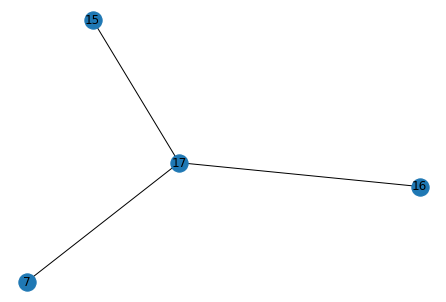

match_branches = [[7, 16]]
edges_to_delete (resolve crossover) = [[7, 15], [7, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[7, 16]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[7, 15], [7, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create = [[7, 16]]
Number of connected components = 3
Comp 0 = {0, 1, 3, 5, 6, 7, 8, 9, 13, 14, 16, 18, 19, 20, 21, 22, 23, 25, 26, 29, 30, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53}
Comp 1 = {4, 10, 11, 12, 15}
Comp 2 = {33, 2, 35, 36, 17, 24, 27, 28, 31}
curr_limb_copy.deleted_edges = [[7, 15], [7, 17], [15, 16], [15, 17], [16, 17]]
curr_limb_copy.created_edges = [[7, 16]]
After get best cut: cut_edges = [[7, 15], [7, 17], [15, 16], [15, 17], [16, 17]], added_edges = [[7, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the

  Edge: [41 37]: curr_angle = 22.29
  Edge: [37 38]: curr_angle = 44.32
  Edge: [38 49]: curr_angle = 53.32
  Edge: [49 55]: curr_angle = 9.54
  Edge: [55 73]: curr_angle = 8.18
  Edge: [73 74]: curr_angle = 16.65

Total time for doubling_back = 0.5610263347625732

Attempting the width jump check (attempting from both sides)
  Edge: [41 37]: jump = -172.35
  Edge: [37 38]: jump = 18.04
  Edge: [38 49]: jump = -205.06
  Edge: [49 55]: jump = 283.32
Adding error edge [49 55] because width jump was 283.31946484599644
  Edge: [55 73]: jump = 90.49
  Edge: [73 74]: jump = 182.56
Total time for width = 0.5018253326416016
Path starting at 41 had err_edges: [[49, 55]]
  Edge: [74 73]: jump = -182.56
  Edge: [73 55]: jump = -90.49
  Edge: [55 49]: jump = -283.32
  Edge: [49 38]: jump = 205.06
Adding error edge [49 38] because width jump was 205.06441160986603
  Edge: [38 37]: jump = -18.04
  Edge: [37 41]: jump = 172.35
Total time for width = 0.5211219787597656
Path starting at 74 had err_edges

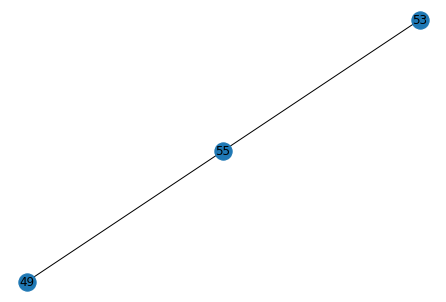

match_branches = [[49, 55]]
edges_to_delete (resolve crossover) = [[49, 53], [53, 55]]
edges_to_create (resolve crossover) = [[49, 55]]
Rejecting creating edge [49, 55] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([49, 53]), array([49, 55]), array([53, 55])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {34, 35, 37, 38, 40, 41, 11, 48, 49, 19, 28}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 36, 39, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 65, 66, 67, 68, 70, 71}
Comp 2 = {64, 69, 72, 73, 74, 55, 63}
curr_limb_copy.deleted_edges = [array([49, 53]), array([49, 55]), array([53, 55])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([49, 53]), array([49, 55]), array([53, 55])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total numb

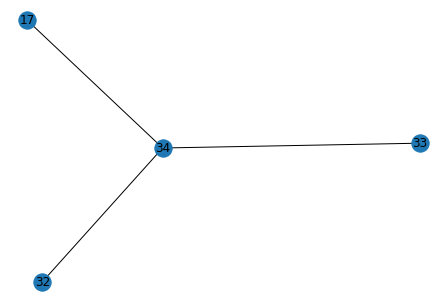

match_branches = []
edges_to_delete (resolve crossover) = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 34]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 34]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {32}
Comp 1 = {0, 2, 4, 5, 7, 9, 17}
Comp 2 = {6, 14, 18, 19, 20, 21, 22, 28, 33, 35, 37, 53, 54, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}
Comp 3 = {1, 3, 8, 10, 11, 12, 13, 15, 16, 23, 24, 25, 26, 27, 29, 30, 31, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 66, 67, 75, 76}
curr_limb_copy.deleted_edges = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 34]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[17, 32], [17, 33], [17, 34], [32, 33], [32, 34], [33, 

  Edge: [10 14]: curr_angle = 91.67

Total time for doubling_back = 0.04462766647338867

Attempting the width jump check (attempting from both sides)
  Edge: [10 14]: jump = 39.22
Total time for width = 0.013478755950927734
Path starting at 10 had err_edges: []
  Edge: [14 10]: jump = -98.2
Total time for width = 0.013640880584716797
Path starting at 14 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***


---- working on disconnecting 10 and 18
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest

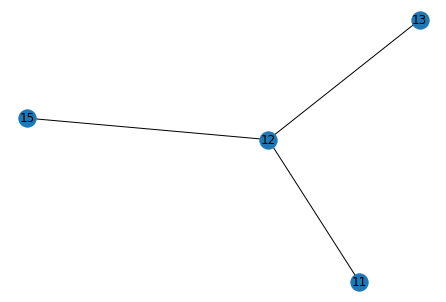

match_branches = [[11, 15], [12, 13]]
edges_to_delete (resolve crossover) = [[11, 12], [11, 13], [12, 15], [13, 15]]
edges_to_create (resolve crossover) = [[11, 15], [12, 13]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 18 because skeletal distance was 2132.2658390477395 and threshold was 2500
skip_nodes = [18]
edges_to_delete (cut_limb_network) = [[11, 12], [11, 13], [12, 15], [13, 15]]
edges_to_create = [[11, 15], [12, 13]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 18, 19, 20, 21}
Comp 1 = {10, 12, 13, 14}
Comp 2 = {17}
curr_limb_copy.deleted_edges = [[11, 12], [11, 13], [12, 15], [13, 15]]
curr_limb_copy.created_edges = [[11, 15], [12, 13]]
After get best cut: cut_edges = [[11, 12], [11, 13], [12, 15], [13, 15]], added_edges = [[11, 15], [12, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the

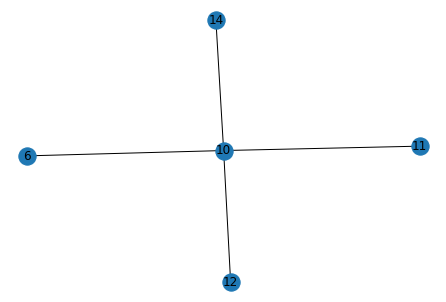

match_branches = [[6, 14]]
edges_to_delete (resolve crossover) = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]]
edges_to_create (resolve crossover) = [[6, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]]
edges_to_create = [[6, 14]]
Number of connected components = 5
Comp 0 = {1, 4, 5, 6, 7, 14, 20, 21}
Comp 1 = {0, 2, 3, 9, 10}
Comp 2 = {11}
Comp 3 = {8, 12, 15, 16, 17, 18, 19, 22, 23}
Comp 4 = {13}
curr_limb_copy.deleted_edges = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]]
curr_limb_copy.created_edges = [[6, 14]]
After get best cut: cut_edges = [[6, 10], [6, 11], [6, 12], [10, 11], [10, 12], [10, 14], [11, 12], [11, 14], [12, 14]], added_edges = [[6, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the sp

  Edge: [36 35]: curr_angle = 39.81
  Edge: [35 15]: curr_angle = 150.54
  Edge: [15 13]: curr_angle = 70.93
  Edge: [13 14]: curr_angle = 162.49
  Edge: [14 31]: curr_angle = 30.69
  Edge: [31 34]: curr_angle = 176.14
  Edge: [34 37]: curr_angle = 132.3

Total time for doubling_back = 0.346599817276001
There were 4 edges that passed doubling back threshold of 100
Winning edge [31 34] had a doubling back of 176.14352233382613
***inside resolve crossover!!!!****
coordinate_branches = [17, 31, 34]
17 = red
31 = aqua
34 = purple
Angle between 17 and 31 = 124.68 
Angle between 17 and 34 = 46.24 
Angle between 31 and 34 = 32.72 
Final Matches = [[31, 34]]
matched_branches_revised = [[31, 34]]
Original graph


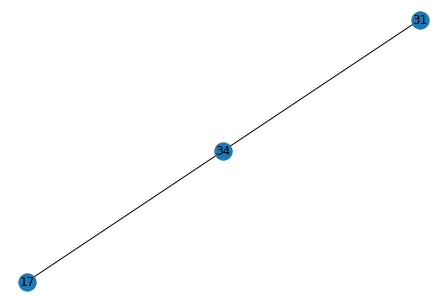

match_branches = [[31, 34]]
edges_to_delete (resolve crossover) = [[17, 31], [17, 34]]
edges_to_create (resolve crossover) = [[31, 34]]
Rejecting creating edge [31, 34] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([17, 31]), array([17, 34]), array([31, 34])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}
Comp 1 = {3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33}
Comp 2 = {0, 1, 2, 35, 36, 11, 13, 14, 15, 20, 31}
curr_limb_copy.deleted_edges = [array([17, 31]), array([17, 34]), array([31, 34])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([17, 31]), array([17, 34]), array([31, 34])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at 

  Edge: [37 40]: curr_angle = 23.42
  Edge: [40 42]: curr_angle = 29.7
  Edge: [42 44]: curr_angle = 11.34
  Edge: [44 48]: curr_angle = 164.82
  Edge: [48 59]: curr_angle = 25.14
  Edge: [59 53]: curr_angle = 58.9

Total time for doubling_back = 0.3737332820892334
There were 1 edges that passed doubling back threshold of 100
Winning edge [44 48] had a doubling back of 164.82210658609304
***inside resolve crossover!!!!****
coordinate_branches = [44, 48, 49]
44 = red
48 = aqua
49 = purple
Angle between 44 and 48 = 152.33 
Angle between 44 and 49 = 31.17 
Angle between 48 and 49 = 20.13 
Final Matches = [[44, 49], [48, 49]]
matched_branches_revised = [[48, 49]]
Original graph


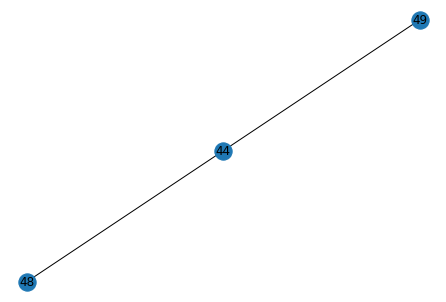

match_branches = [[48, 49]]
edges_to_delete (resolve crossover) = [[44, 48], [44, 49]]
edges_to_create (resolve crossover) = [[48, 49]]
edges_to_delete (cut_limb_network) = [array([44, 48]), array([44, 49])]
edges_to_create = [[48, 49]]
Number of connected components = 4
Comp 0 = {67, 68, 69, 70, 48, 49, 53, 58, 59, 60}
Comp 1 = {34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 54, 55, 56, 57, 61, 62, 63, 64, 65, 66}
Comp 2 = {3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33}
Comp 3 = {0, 1, 2, 35, 36, 11, 13, 14, 15, 20, 31}
curr_limb_copy.deleted_edges = [array([17, 31]), array([17, 34]), array([31, 34]), array([44, 48]), array([44, 49])]
curr_limb_copy.created_edges = [[48, 49]]
After get best cut: cut_edges = [array([44, 48]), array([44, 49])], added_edges = [[48, 49]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total numbe

  Edge: [37 41]: curr_angle = 52.23
  Edge: [41 62]: curr_angle = 107.76
  Edge: [62 61]: curr_angle = 86.8
  Edge: [61 55]: curr_angle = 83.82

Total time for doubling_back = 0.19661498069763184
There were 1 edges that passed doubling back threshold of 100
Winning edge [41 62] had a doubling back of 107.76103038702485
***inside resolve crossover!!!!****
coordinate_branches = [41, 62, 63]
41 = red
62 = aqua
63 = purple
Angle between 41 and 62 = 146.73 
Angle between 41 and 63 = 24.85 
Angle between 62 and 63 = 47.25 
Final Matches = [[41, 63]]
matched_branches_revised = [[41, 63]]
Original graph


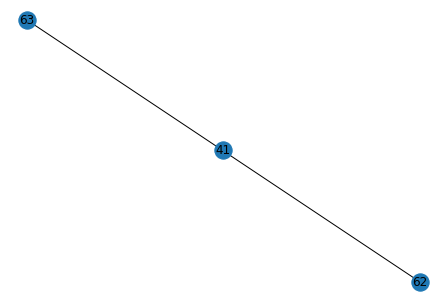

match_branches = [[41, 63]]
edges_to_delete (resolve crossover) = [[41, 62], [62, 63]]
edges_to_create (resolve crossover) = [[41, 63]]
edges_to_delete (cut_limb_network) = [array([41, 62]), array([62, 63])]
edges_to_create = [[41, 63]]
Number of connected components = 5
Comp 0 = {67, 68, 69, 70, 48, 49, 53, 58, 59, 60}
Comp 1 = {65, 34, 66, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 54, 56, 57, 63}
Comp 2 = {64, 39, 55, 61, 62}
Comp 3 = {3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33}
Comp 4 = {0, 1, 2, 35, 36, 11, 13, 14, 15, 20, 31}
curr_limb_copy.deleted_edges = [array([17, 31]), array([17, 34]), array([31, 34]), array([44, 48]), array([44, 49]), array([41, 62]), array([62, 63])]
curr_limb_copy.created_edges = [[48, 49], [41, 63]]
After get best cut: cut_edges = [array([41, 62]), array([62, 63])], added_edges = [[41, 63]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at t

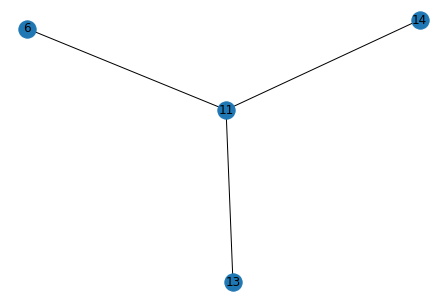

match_branches = [[11, 14], [6, 13]]
edges_to_delete (resolve crossover) = [[6, 11], [6, 14], [11, 13], [13, 14]]
edges_to_create (resolve crossover) = [[11, 14], [6, 13]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 11], [6, 14], [11, 13], [13, 14]]
edges_to_create = [[11, 14], [6, 13]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 8, 9, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47}
Comp 1 = {10, 11, 14, 7}
Comp 2 = {12}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [11, 13], [13, 14]]
curr_limb_copy.created_edges = [[11, 14], [6, 13]]
After get best cut: cut_edges = [[6, 11], [6, 14], [11, 13], [13, 14]], added_edges = [[11, 14], [6, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the sp

  Edge: [39 35]: curr_angle = 40.93
  Edge: [35 27]: curr_angle = 25.25
  Edge: [27 25]: curr_angle = 20.43
  Edge: [25 33]: curr_angle = 143.75
  Edge: [33 34]: curr_angle = 28.2
  Edge: [34 40]: curr_angle = 34.58

Total time for doubling_back = 0.16098546981811523
There were 1 edges that passed doubling back threshold of 100
Winning edge [25 33] had a doubling back of 143.7453140068512
***inside resolve crossover!!!!****
coordinate_branches = [25, 30, 33]
25 = red
30 = aqua
33 = purple
Angle between 25 and 30 = 14.85 
Angle between 25 and 33 = 157.11 
Angle between 30 and 33 = 26.03 
Final Matches = [[25, 30], [30, 33]]
matched_branches_revised = [[25, 30]]
Original graph


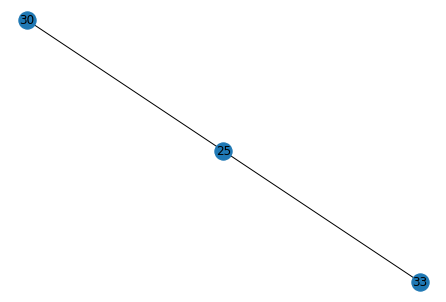

match_branches = [[25, 30]]
edges_to_delete (resolve crossover) = [[25, 33], [30, 33]]
edges_to_create (resolve crossover) = [[25, 30]]
edges_to_delete (cut_limb_network) = [array([25, 33]), array([30, 33])]
edges_to_create = [[25, 30]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 8, 9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47}
Comp 1 = {33, 34, 6, 40, 41, 13}
Comp 2 = {10, 11, 14, 7}
Comp 3 = {12}
curr_limb_copy.deleted_edges = [[6, 11], [6, 14], [11, 13], [13, 14], array([25, 33]), array([30, 33])]
curr_limb_copy.created_edges = [[11, 14], [6, 13], [25, 30]]
After get best cut: cut_edges = [array([25, 33]), array([30, 33])], added_edges = [[25, 30]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto

  Edge: [18 11]: curr_angle = 57.34
  Edge: [11  9]: curr_angle = 101.18
  Edge: [9 8]: curr_angle = 83.49
  Edge: [ 8 29]: curr_angle = 33.98
  Edge: [29 21]: curr_angle = 109.82

Total time for doubling_back = 0.6664793491363525
There were 2 edges that passed doubling back threshold of 100
Winning edge [29 21] had a doubling back of 109.82117430298577
***inside resolve crossover!!!!****
coordinate_branches = [21, 27, 29]
21 = red
27 = aqua
29 = purple
Angle between 21 and 27 = 41.59 
Angle between 21 and 29 = 117.55 
Angle between 27 and 29 = 71.2 
Final Matches = []
matched_branches_revised = []
Original graph


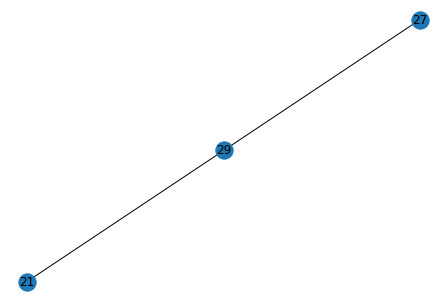

match_branches = []
edges_to_delete (resolve crossover) = [[21, 27], [21, 29], [27, 29]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([21, 27]), array([21, 29]), array([27, 29])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 29, 30}
Comp 1 = {21}
Comp 2 = {0, 7, 14, 15, 19, 20, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38}
curr_limb_copy.deleted_edges = [array([21, 27]), array([21, 29]), array([27, 29])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([21, 27]), array([21, 29]), array([27, 29])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 18 and 35
---- This disconnec

  Edge: [7 3]: curr_angle = 101.6
  Edge: [3 5]: curr_angle = 84.07

Total time for doubling_back = 0.06709885597229004
There were 1 edges that passed doubling back threshold of 100
Winning edge [7 3] had a doubling back of 101.60412506270154
***inside resolve crossover!!!!****
coordinate_branches = [3, 7, 8]
3 = red
7 = aqua
8 = purple
Angle between 3 and 7 = 106.16 
Angle between 3 and 8 = 75.05 
Angle between 7 and 8 = 15.45 
Final Matches = [[7, 8]]
matched_branches_revised = [[7, 8]]
Original graph


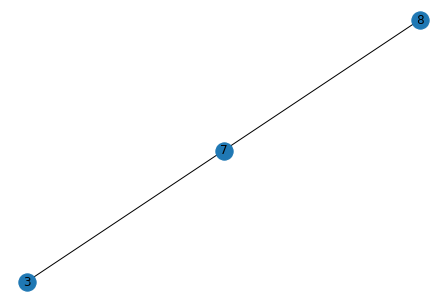

match_branches = [[7, 8]]
edges_to_delete (resolve crossover) = [[3, 7], [3, 8]]
edges_to_create (resolve crossover) = [[7, 8]]
edges_to_delete (cut_limb_network) = [array([3, 7]), array([3, 8])]
edges_to_create = [[7, 8]]
Number of connected components = 2
Comp 0 = {0, 3, 5}
Comp 1 = {1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
curr_limb_copy.deleted_edges = [array([3, 7]), array([3, 8])]
curr_limb_copy.created_edges = [[7, 8]]
After get best cut: cut_edges = [array([3, 7]), array([3, 8])], added_edges = [[7, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection


---- working on disconnecting 4 and 9
---- This disconnects S1_0 from S0_1  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2


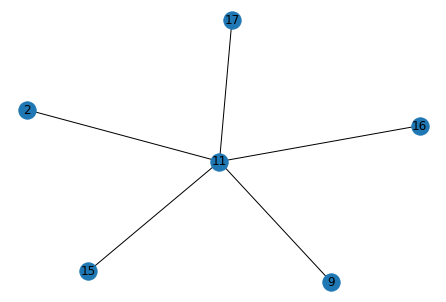

match_branches = [[11, 15], [9, 16]]
edges_to_delete (resolve crossover) = [[2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 17], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create (resolve crossover) = [[11, 15], [9, 16]]
curr_limb.deleted_edges 5 =[array([3, 7]), array([3, 8])]
Skipping endnode 4 because skeletal distance was 1504.6747315450286 and threshold was 2500
skip_nodes = [4]
edges_to_delete (cut_limb_network) = [[2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 17], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
edges_to_create = [[11, 15], [9, 16]]
Number of connected components = 5
Comp 0 = {0, 3, 5}
Comp 1 = {1, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15}
Comp 2 = {2}
Comp 3 = {9, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 4 = {17}
curr_limb_copy.deleted_edges = [array([3, 7]), array([3, 8]), [2, 9], [2, 11], [2, 15], [2, 16], [2, 17], [9, 11], [9, 15], [9, 17], [11, 16], [11, 17], [15, 16], [15, 17], [16, 17]]
curr_limb_copy.c

  Edge: [2 5]: curr_angle = 44.58
  Edge: [5 1]: curr_angle = 80.47
  Edge: [1 3]: curr_angle = 38.64
  Edge: [3 7]: curr_angle = 29.13

Total time for doubling_back = 0.207597017288208

Attempting the width jump check (attempting from both sides)
  Edge: [2 5]: jump = -166.79
  Edge: [5 1]: jump = -199.65
  Edge: [1 3]: jump = 86.63
  Edge: [3 7]: jump = 158.3
Total time for width = 0.17724967002868652
Path starting at 2 had err_edges: []
  Edge: [7 3]: jump = -158.3
  Edge: [3 1]: jump = -86.63
  Edge: [1 5]: jump = 199.65
  Edge: [5 2]: jump = 166.79
Total time for width = 0.18133115768432617
Path starting at 7 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***

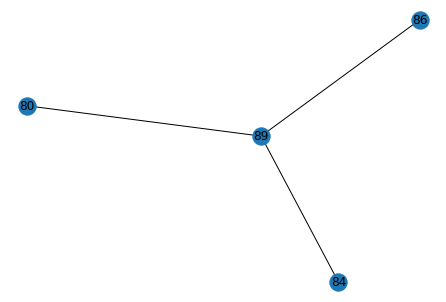

match_branches = [[80, 84], [86, 89]]
edges_to_delete (resolve crossover) = [[80, 86], [80, 89], [84, 86], [84, 89]]
edges_to_create (resolve crossover) = [[80, 84], [86, 89]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[80, 86], [80, 89], [84, 86], [84, 89]]
edges_to_create = [[80, 84], [86, 89]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 84, 86.0, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104}
Comp 1 = {74}
Comp 2 = {75}
Comp 3 = {76}
Comp 4 = {83}
Comp 5 = {85}
curr_limb_copy.deleted_edges = [[80, 86], [80, 89], [84, 86], [84, 89]]
curr_limb_copy.created_edges = [[80, 84], [86, 89]]
After get best cut: cut_e

  Edge: [21. 22.]: curr_angle = 11.88
  Edge: [22. 23.]: curr_angle = 21.3
  Edge: [23. 24.]: curr_angle = 31.25
  Edge: [24. 25.]: curr_angle = 10.17
  Edge: [25. 28.]: curr_angle = 8.92
  Edge: [28. 32.]: curr_angle = 13.64
  Edge: [32. 34.]: curr_angle = 23.96
  Edge: [34. 37.]: curr_angle = 22.4
  Edge: [37. 47.]: curr_angle = 36.94
  Edge: [ 47. 103.]: curr_angle = 111.43
  Edge: [103.  99.]: curr_angle = 56.53
  Edge: [99. 89.]: curr_angle = 29.38
  Edge: [89. 86.]: curr_angle = 17.44
  Edge: [86. 81.]: curr_angle = 13.84
  Edge: [81. 79.]: curr_angle = 11.15
  Edge: [79. 67.]: curr_angle = 15.8
  Edge: [67. 65.]: curr_angle = 17.51
  Edge: [65. 66.]: curr_angle = 22.17
  Edge: [66. 68.]: curr_angle = 26.76
  Edge: [68. 72.]: curr_angle = 20.94
  Edge: [72. 95.]: curr_angle = 2.84

Total time for doubling_back = 1.8810722827911377
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 47. 103.] had a doubling back of 111.43423472521879
***inside resolve cros

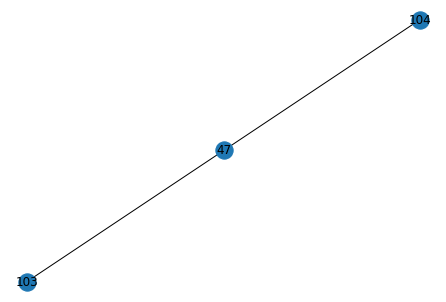

match_branches = [[47, 104]]
edges_to_delete (resolve crossover) = [[47, 103], [103, 104]]
edges_to_create (resolve crossover) = [[47, 104]]
edges_to_delete (cut_limb_network) = [array([ 47., 103.]), array([103., 104.])]
edges_to_create = [[47, 104]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 37, 38, 39, 44, 46, 47, 49, 50, 100, 101, 104}
Comp 1 = {13, 17, 19, 20, 29, 33, 35, 36, 40, 41, 42, 43, 45, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 84, 86.0, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103}
Comp 2 = {74}
Comp 3 = {75}
Comp 4 = {76}
Comp 5 = {83}
Comp 6 = {85}
curr_limb_copy.deleted_edges = [[80, 86], [80, 89], [84, 86], [84, 89], array([ 47., 103.]), array([103., 104.])]
curr_limb_copy.created_edges = [[80, 84], [86, 89], [47, 104]]
After get best cut: cut_edges = [array([ 47., 103.

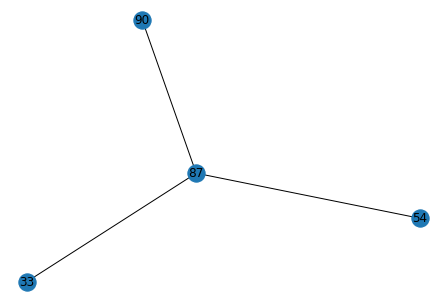

match_branches = [[87, 90]]
edges_to_delete (resolve crossover) = [[33, 54], [33, 87], [33, 90], [54, 87], [54, 90]]
edges_to_create (resolve crossover) = [[87, 90]]
curr_limb.deleted_edges 5 =[[80, 86], [80, 89], [84, 86], [84, 89], array([ 47., 103.]), array([103., 104.])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[33, 54], [33, 87], [33, 90], [54, 87], [54, 90]]
edges_to_create = [[87, 90]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 37, 38, 39, 44, 46, 47, 49, 50, 100, 101, 104}
Comp 1 = {13, 19, 20, 29, 35, 36, 40, 41, 42, 43, 45, 48, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 84, 86.0, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103}
Comp 2 = {33}
Comp 3 = {17, 53, 54}
Comp 4 = {74}
Comp 5 = {75}
Comp 6 = {76}
Comp 7 = {83}
Comp 8 = {85}
Comp 9 = {88}
curr_limb_copy.deleted_edges = [[80, 8

  Edge: [95 72]: curr_angle = 2.84
  Edge: [72 68]: curr_angle = 20.94
  Edge: [68 66]: curr_angle = 19.67
  Edge: [66 65]: curr_angle = 20.14
  Edge: [65 67]: curr_angle = 17.51
  Edge: [67 71]: curr_angle = 140.62
  Edge: [71 70]: curr_angle = 19.62
  Edge: [70 77]: curr_angle = 1.41
  Edge: [77 82]: curr_angle = 26.15
  Edge: [82 93]: curr_angle = 12.62
  Edge: [93 87]: curr_angle = 15.93
  Edge: [87 90]: curr_angle = 23.63
  Edge: [90 98]: curr_angle = 28.43

Total time for doubling_back = 0.6660032272338867
There were 1 edges that passed doubling back threshold of 100
Winning edge [67 71] had a doubling back of 140.61770196996082
***inside resolve crossover!!!!****
coordinate_branches = [67, 71, 79]
67 = red
71 = aqua
79 = purple
Angle between 67 and 71 = 129.26 
Angle between 67 and 79 = 9.26 
Angle between 71 and 79 = 48.64 
Final Matches = [[67, 79]]
matched_branches_revised = [[67, 79]]
Original graph


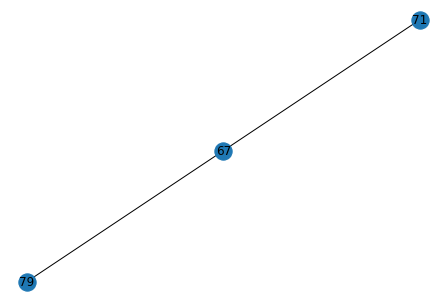

match_branches = [[67, 79]]
edges_to_delete (resolve crossover) = [[67, 71], [71, 79]]
edges_to_create (resolve crossover) = [[67, 79]]
edges_to_delete (cut_limb_network) = [array([67, 71]), array([71, 79])]
edges_to_create = [[67, 79]]
Number of connected components = 11
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 37, 38, 39, 44, 46, 47, 49, 50, 100, 101, 104}
Comp 1 = {13, 19, 29, 35, 36, 40, 41, 42, 43, 45, 51, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 78, 79, 80, 81, 84, 86.0, 89, 91, 92, 95, 99, 102, 103}
Comp 2 = {96, 97, 98, 70, 71, 73, 77, 48, 82, 52, 20, 87, 90, 59, 93, 94}
Comp 3 = {33}
Comp 4 = {17, 53, 54}
Comp 5 = {74}
Comp 6 = {75}
Comp 7 = {76}
Comp 8 = {83}
Comp 9 = {85}
Comp 10 = {88}
curr_limb_copy.deleted_edges = [[80, 86], [80, 89], [84, 86], [84, 89], array([ 47., 103.]), array([103., 104.]), [33, 54], [33, 87], [33, 90], [54, 87], [54, 90], array([67, 71]), array([71, 79])]
c

  Edge: [3 2]: curr_angle = 9.54
  Edge: [2 1]: curr_angle = 156.82
  Edge: [1 5]: curr_angle = 55.05

Total time for doubling_back = 0.18732762336730957
There were 1 edges that passed doubling back threshold of 100
Winning edge [2 1] had a doubling back of 156.82036088837637
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 9.88 
Angle between 0 and 2 = 53.85 
Angle between 1 and 2 = 128.89 
Final Matches = [[0, 1]]
matched_branches_revised = [[0, 1]]
Original graph


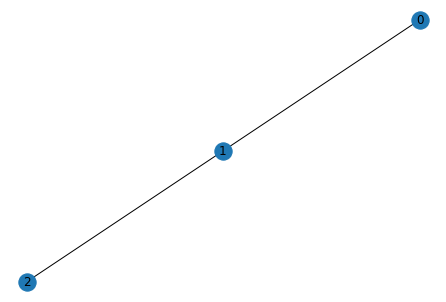

match_branches = [[0, 1]]
edges_to_delete (resolve crossover) = [[0, 2], [1, 2]]
edges_to_create (resolve crossover) = [[0, 1]]
edges_to_delete (cut_limb_network) = [array([0, 2]), array([1, 2])]
edges_to_create = [[0, 1]]
Number of connected components = 2
Comp 0 = {0, 1, 5, 6}
Comp 1 = {2, 3, 4}
curr_limb_copy.deleted_edges = [array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = [[0, 1]]
After get best cut: cut_edges = [array([0, 2]), array([1, 2])], added_edges = [[0, 1]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 1, 5, 6]), array([2, 3, 4])]


 ------ Total time for Splitting 864691135274155493 = 269.6788866519928 ------


----- Working on 864691135382504922-------
Decompressing Neuron in m

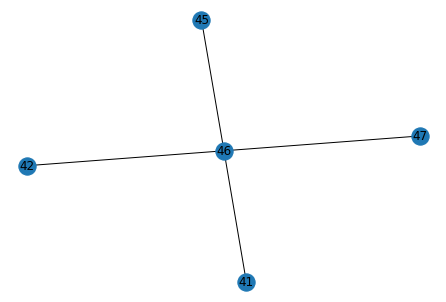

match_branches = [[41, 45]]
edges_to_delete (resolve crossover) = [[41, 42], [41, 46], [41, 47], [42, 45], [42, 46], [42, 47], [45, 46], [45, 47], [46, 47]]
edges_to_create (resolve crossover) = [[41, 45]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 42], [41, 46], [41, 47], [42, 45], [42, 46], [42, 47], [45, 46], [45, 47], [46, 47]]
edges_to_create = [[41, 45]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 10, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 41, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57.0, 58, 59.0, 60, 61, 62, 63, 64, 65}
Comp 1 = {3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 17, 36, 37, 38, 40, 42, 43, 44, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
curr_limb_copy.deleted_edges = [[41, 42], [41, 46], [41, 47], [42, 45], [42, 46], [42, 47], [45, 46], [45, 47], [46, 47]]
curr_limb_copy.created_edges = [[41, 45]]
After get best cut: cut_edges = [[41, 42], [41, 46], [41, 

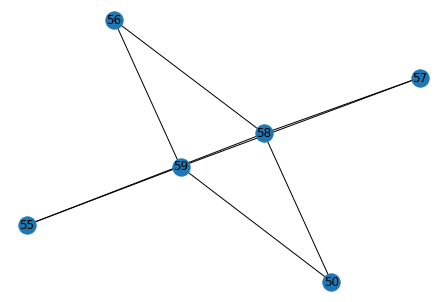

match_branches = [[55, 56], [50, 58]]
edges_to_delete (resolve crossover) = [[50, 55], [50, 56], [50, 57], [50, 59], [55, 57], [55, 58], [55, 59], [56, 57], [56, 58], [56, 59], [57, 58], [57, 59], [58, 59]]
edges_to_create (resolve crossover) = [[55, 56], [50, 58]]
curr_limb.deleted_edges 5 =[[41, 42], [41, 46], [41, 47], [42, 45], [42, 46], [42, 47], [45, 46], [45, 47], [46, 47]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[50, 55], [50, 56], [50, 57], [50, 59], [55, 57], [55, 58], [55, 59], [56, 57], [56, 58], [56, 59], [57, 58], [57, 59], [58, 59]]
edges_to_create = [[55, 56], [50, 58]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 10, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 50, 52, 53, 58, 59.0, 60, 61, 62, 63, 64, 65}
Comp 1 = {41, 45, 46, 47, 48, 49, 51, 54, 55, 56, 57.0}
Comp 2 = {3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 17, 36, 37, 38, 40, 42, 43, 44, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
curr_limb_copy

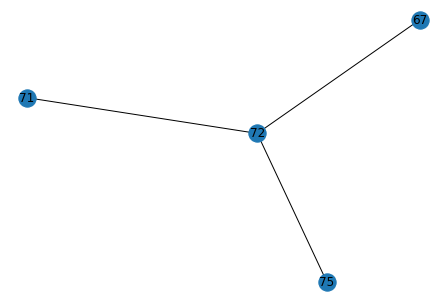

match_branches = []
edges_to_delete (resolve crossover) = [[67, 71], [67, 72], [67, 75], [71, 72], [71, 75], [72, 75]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[41, 42], [41, 46], [41, 47], [42, 45], [42, 46], [42, 47], [45, 46], [45, 47], [46, 47], [50, 55], [50, 56], [50, 57], [50, 59], [55, 57], [55, 58], [55, 59], [56, 57], [56, 58], [56, 59], [57, 58], [57, 59], [58, 59]]
Skipping endnode 43 because skeletal distance was 361.0499233601728 and threshold was 2500
skip_nodes = [43]
edges_to_delete (cut_limb_network) = [[67, 71], [67, 72], [67, 75], [71, 72], [71, 75], [72, 75]]
edges_to_create = []
Number of connected components = 7
Comp 0 = {0, 1, 2, 10, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 50, 52, 53, 58, 59.0, 60, 61, 62, 63, 64, 65}
Comp 1 = {41, 45, 46, 47, 48, 49, 51, 54, 55, 56, 57.0}
Comp 2 = {68, 36, 69, 37, 40, 38, 42, 43, 44, 77, 76, 72, 73, 78, 79}
Comp 3 = {67}
Comp 4 = {66, 3, 4, 5, 70, 71, 8, 9,

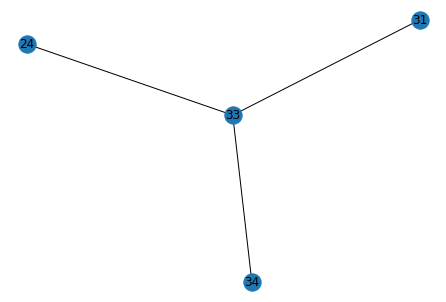

match_branches = []
edges_to_delete (resolve crossover) = [[24, 31], [24, 33], [24, 34], [31, 33], [31, 34], [33, 34]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[24, 31], [24, 33], [24, 34], [31, 33], [31, 34], [33, 34]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {33}
Comp 1 = {1, 2, 3, 6, 10, 20, 24}
Comp 2 = {0, 4, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 3 = {9, 22, 34, 35, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 59, 61.0, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91}
Comp 4 = {32}
Comp 5 = {58}
Comp 6 = {60}
Comp 7 = {63}
curr_limb_copy.deleted_edges = [[24, 31], [24, 33], [24, 34], [31, 33], [31, 34], [33, 34]]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [[24, 31], [24, 33], [24, 34], [31, 33], [

  Edge: [70 73]: curr_angle = 46.68

Total time for doubling_back = 0.04118466377258301

Attempting the width jump check (attempting from both sides)
  Edge: [70 73]: jump = 143.81
Total time for width = 0.011066436767578125
Path starting at 70 had err_edges: []
  Edge: [73 70]: jump = -143.81
Total time for width = 0.012075662612915039
Path starting at 73 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 8
Comp 0 = {33}
Comp 1 = {1, 2, 3, 6, 10, 20, 24}
Comp 2 = {0, 4, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 3 = {9, 22, 34, 35, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 59, 61.0, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91}
Comp 4 = {32}
Comp 5 = {58}
Comp 6 = {60}
Comp 7 = {63}
curr_limb_copy.deleted_edges = [[24, 31], [24, 33], [24, 34], [31, 33], [31, 34], [33, 34]]
curr_l

  Edge: [70 73]: curr_angle = 46.68
  Edge: [73 75]: curr_angle = 154.37
  Edge: [75 89]: curr_angle = 72.31
  Edge: [89 80]: curr_angle = 169.36
  Edge: [80 78]: curr_angle = 28.59

Total time for doubling_back = 0.31787753105163574
There were 2 edges that passed doubling back threshold of 100
Winning edge [89 80] had a doubling back of 169.35663855821713
***inside resolve crossover!!!!****
coordinate_branches = [80, 89, 91]
80 = red
89 = aqua
91 = purple
Angle between 80 and 89 = 84.41 
Angle between 80 and 91 = 34.46 
Angle between 89 and 91 = 102.33 
Final Matches = [[80, 91]]
matched_branches_revised = [[80, 91]]
Original graph


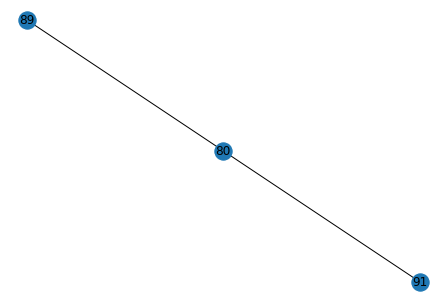

match_branches = [[80, 91]]
edges_to_delete (resolve crossover) = [[80, 89], [89, 91]]
edges_to_create (resolve crossover) = [[80, 91]]
edges_to_delete (cut_limb_network) = [array([80, 89]), array([89, 91])]
edges_to_create = [[80, 91]]
Number of connected components = 9
Comp 0 = {33}
Comp 1 = {1, 2, 3, 6, 10, 20, 24}
Comp 2 = {0, 4, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 49, 51}
Comp 3 = {9, 22, 34, 35, 45, 46, 48, 50, 52, 53, 54, 55, 56, 57, 59, 61.0, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Comp 4 = {76, 78, 79, 80, 81, 91}
Comp 5 = {32}
Comp 6 = {58}
Comp 7 = {60}
Comp 8 = {63}
curr_limb_copy.deleted_edges = [[24, 31], [24, 33], [24, 34], [31, 33], [31, 34], [33, 34], array([80, 89]), array([89, 91])]
curr_limb_copy.created_edges = [[80, 91]]
After get best cut: cut_edges = [array([80, 89]), array([89, 91])], added_edges = [[80, 91]]
total_soma_paths_

  Edge: [1 2]: curr_angle = 135.24

Total time for doubling_back = 0.03193044662475586
There were 1 edges that passed doubling back threshold of 100
Winning edge [1 2] had a doubling back of 135.24492811369964
***inside resolve crossover!!!!****
coordinate_branches = [0, 1, 2]
0 = red
1 = aqua
2 = purple
Angle between 0 and 1 = 64.45 
Angle between 0 and 2 = 63.56 
Angle between 1 and 2 = 135.23 
Final Matches = []
matched_branches_revised = []
Original graph


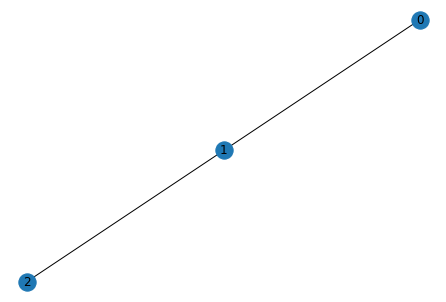

match_branches = []
edges_to_delete (resolve crossover) = [[0, 1], [0, 2], [1, 2]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([0, 1]), array([0, 2]), array([1, 2])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {2}
Comp 1 = {0}
Comp 2 = {1}
curr_limb_copy.deleted_edges = [array([0, 1]), array([0, 2]), array([1, 2])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([0, 1]), array([0, 2]), array([1, 2])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([2]), array([0]), array([1])]


 ------ Total time for Splitting 864691135382504922 = 419.5858130455017 ------


----- Working on 864691135012398582-------
Decompr

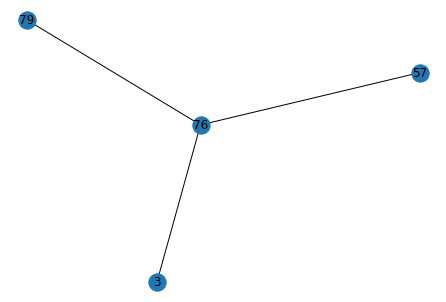

match_branches = [[57, 76]]
edges_to_delete (resolve crossover) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create (resolve crossover) = [[57, 76]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create = [[57, 76]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130}
Comp 1 = {3}
Comp 2 = {77}
Comp 3 = {87}
curr_limb_copy.deleted_edges = [[3, 57], [3, 76], [3, 79]

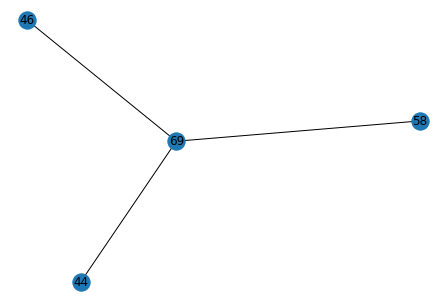

match_branches = [[58, 69]]
edges_to_delete (resolve crossover) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create (resolve crossover) = [[58, 69]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create = [[58, 69]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130}
Comp 1 = {3}
Comp 2 = {44}
Comp 3 = {46}
Comp 4 = {77}
Comp

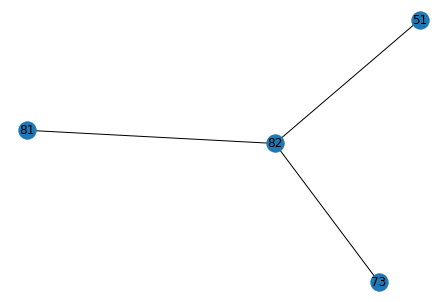

match_branches = [[51, 81], [73, 82]]
edges_to_delete (resolve crossover) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create (resolve crossover) = [[51, 81], [73, 82]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create = [[51, 81], [73, 82]]
Number of connected components = 9
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 45, 47, 49, 52, 53, 54, 55, 57, 61, 62, 63, 70, 71, 73, 76, 78, 82, 86, 93, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 115, 116, 118, 119, 120}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122, 123

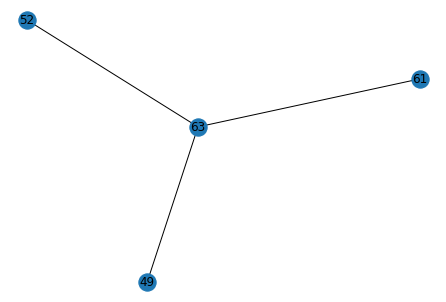

match_branches = [[52, 63]]
edges_to_delete (resolve crossover) = [[49, 52], [49, 61], [49, 63], [52, 61], [61, 63]]
edges_to_create (resolve crossover) = [[52, 63]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[49, 52], [49, 61], [49, 63], [52, 61], [61, 63]]
edges_to_create = [[52, 63]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {49}
Comp 4 = {18, 36, 37, 61, 70, 71, 78, 93, 101, 102, 1

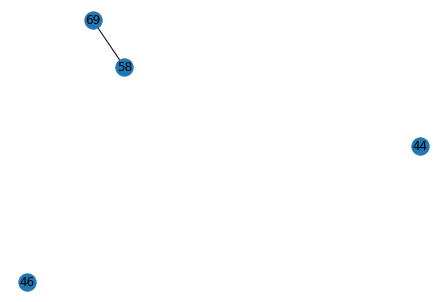

match_branches = [[58, 69]]
edges_to_delete (resolve crossover) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create (resolve crossover) = [[58, 69]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create = [[58, 69]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122, 123, 124, 125, 126, 127}
Comp 3 = {49}
Com

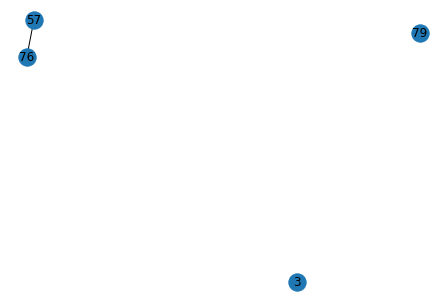

match_branches = [[57, 76]]
edges_to_delete (resolve crossover) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create (resolve crossover) = [[57, 76]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
edges_to_create = [[57, 76]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 90, 91, 92, 94.0, 95, 98, 99, 100, 105, 106, 110, 117, 121, 122

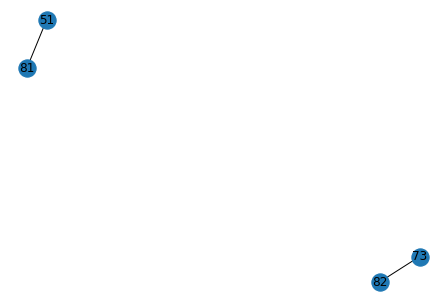

match_branches = [[51, 81], [73, 82]]
edges_to_delete (resolve crossover) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create (resolve crossover) = [[51, 81], [73, 82]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[51, 73], [51, 82], [73, 81], [81, 82]]
edges_to_create = [[51, 81], [73, 82]]
Number of connected components = 13
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {128, 129, 2, 130, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 68, 69, 72, 74, 75, 79, 80, 81, 83, 84, 85, 88, 89, 

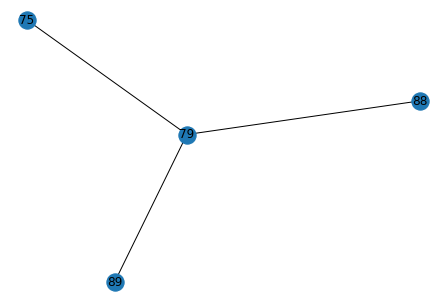

match_branches = [[75, 88]]
edges_to_delete (resolve crossover) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create (resolve crossover) = [[75, 88]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create = [[75, 88]]
Number of connected components = 15
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {128, 129, 130, 2, 9, 38, 41, 43, 48, 50, 51, 56, 58, 59, 60, 64, 65, 66, 67, 69, 74, 

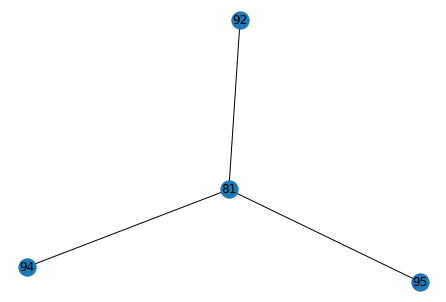

match_branches = [[94, 95], [81, 92]]
edges_to_delete (resolve crossover) = [[81, 94], [81, 95], [92, 94], [92, 95]]
edges_to_create (resolve crossover) = [[94, 95], [81, 92]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[81, 94], [81, 95], [92, 94], [92, 95]]
edges_to_create = [[94, 95], [81, 92]]
Number of connected components = 15
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {128, 129, 130, 2, 9, 38, 

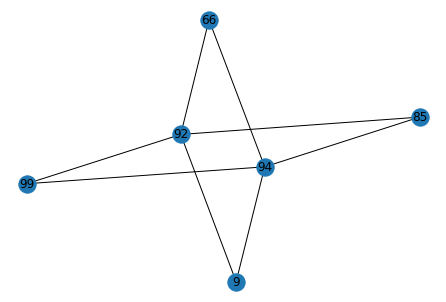

match_branches = [[85, 92], [9, 99]]
edges_to_delete (resolve crossover) = [[9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99]]
edges_to_create (resolve crossover) = [[85, 92], [9, 99]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99]]
edges_to_create = [[85, 92], [9, 99]]
Number of connected components = 18
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 1

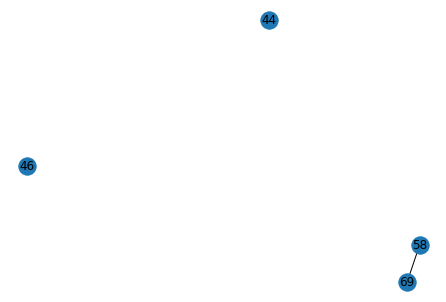

match_branches = [[58, 69]]
edges_to_delete (resolve crossover) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create (resolve crossover) = [[58, 69]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95], [9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99]]
Skipping endnode 105 because skeletal distance was 592.115544039816 and threshold was 2500
skip_nodes = [105]
edges_to_delete (cut_limb_network) = [[44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
edges_to_create = [[58, 69]]
Number of connected components = 18
Com

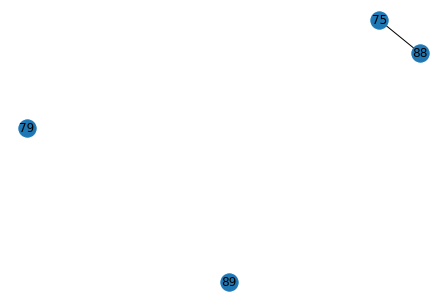

match_branches = [[75, 88]]
edges_to_delete (resolve crossover) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create (resolve crossover) = [[75, 88]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95], [9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69]]
Skipping endnode 105 because skeletal distance was 592.115544039816 and threshold was 2500
skip_nodes = [105]
edges_to_delete (cut_limb_network) = [[75, 79], [75, 89], [79, 88], [79, 89], [88, 89]]
edges_to_create = 

  Edge: [88 75]: curr_angle = 29.97
  Edge: [75 69]: curr_angle = 30.09
  Edge: [69 58]: curr_angle = 12.51
  Edge: [58 65]: curr_angle = 81.79
  Edge: [65 64]: curr_angle = 87.31
  Edge: [64 84]: curr_angle = 39.02
  Edge: [ 84 100]: curr_angle = 75.8

Total time for doubling_back = 0.40300607681274414

Attempting the width jump check (attempting from both sides)
  Edge: [88 75]: jump = -239.23
  Edge: [75 69]: jump = -144.97
  Edge: [69 58]: jump = -68.86
  Edge: [58 65]: jump = -223.03
  Edge: [65 64]: jump = 216.83
Adding error edge [65 64] because width jump was 216.82574037400224
  Edge: [64 84]: jump = 96.2
  Edge: [ 84 100]: jump = 239.65
Adding error edge [ 84 100] because width jump was 239.65093317445616
Total time for width = 0.3663756847381592
Path starting at 88 had err_edges: [[65, 64], [84, 100]]
  Edge: [100  84]: jump = -239.65
  Edge: [84 64]: jump = -96.2
  Edge: [64 65]: jump = -210.72
  Edge: [65 58]: jump = 229.13
Adding error edge [65 58] because width jump was 

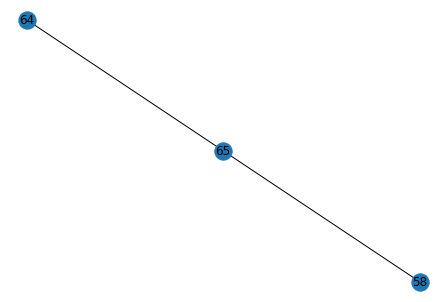

match_branches = [[58, 64]]
edges_to_delete (resolve crossover) = [[58, 65], [64, 65]]
edges_to_create (resolve crossover) = [[58, 64]]
edges_to_delete (cut_limb_network) = [array([58, 65]), array([64, 65])]
edges_to_create = [[58, 64]]
Number of connected components = 19
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {129, 98, 130, 122, 123, 110, 124, 81, 51, 85, 121, 90, 91, 92}
Comp 4 = {128, 2, 38, 43, 48, 50, 56, 58, 59, 60, 64, 67, 69, 74, 75, 84, 88, 100, 105, 106, 117, 125, 126, 127}
Comp 5 = {68, 72, 80, 83, 89}
Comp 6 = {94.0, 95}
Comp 7 = {49}
Comp 8 = {18, 36, 37, 61, 70, 71, 78, 93, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 116, 118.0, 119, 120}
Comp 9 = {9, 99}
Comp 10 = {65, 66, 41}
Comp 11 = {44}
Comp 12 = {46}
Comp 13 = {62}
Comp 14 = {77}
Comp 15 = {87}
Comp 16 = {96}
Comp 17 = 

  Edge: [88 75]: curr_angle = 29.97
  Edge: [75 69]: curr_angle = 30.09
  Edge: [69 58]: curr_angle = 12.51
  Edge: [58 64]: curr_angle = 14.05
  Edge: [64 84]: curr_angle = 39.02
  Edge: [ 84 100]: curr_angle = 75.8

Total time for doubling_back = 0.4009237289428711

Attempting the width jump check (attempting from both sides)
  Edge: [88 75]: jump = -239.23
  Edge: [75 69]: jump = -144.97
  Edge: [69 58]: jump = -68.86
  Edge: [58 64]: jump = -12.31
  Edge: [64 84]: jump = 96.2
  Edge: [ 84 100]: jump = 239.65
Adding error edge [ 84 100] because width jump was 239.65093317445616
Total time for width = 0.3487577438354492
Path starting at 88 had err_edges: [[84, 100]]
  Edge: [100  84]: jump = -239.65
  Edge: [84 64]: jump = -96.2
  Edge: [64 58]: jump = 12.31
  Edge: [58 69]: jump = 68.86
  Edge: [69 75]: jump = 144.97
  Edge: [75 88]: jump = 239.23
Adding error edge [75 88] because width jump was 239.22716827027705
Total time for width = 0.3423464298248291
Path starting at 105 had er

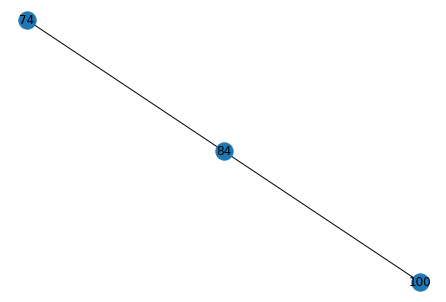

match_branches = [[84, 100]]
edges_to_delete (resolve crossover) = [[74, 84], [74, 100]]
edges_to_create (resolve crossover) = [[84, 100]]
Rejecting creating edge [84, 100] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([74, 84]), array([ 74, 100]), array([ 84, 100])]
edges_to_create = []
Number of connected components = 21
Comp 0 = {0, 1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 42, 45, 47, 52, 53, 54, 55, 57, 63, 73, 76, 82, 86}
Comp 1 = {3}
Comp 2 = {79}
Comp 3 = {129, 98, 130, 122, 123, 110, 124, 81, 51, 85, 121, 90, 91, 92}
Comp 4 = {64, 2, 67, 69, 38, 43, 75, 50, 84, 88, 58, 59}
Comp 5 = {68, 72, 80, 83, 89}
Comp 6 = {94.0, 95}
Comp 7 = {49}
Comp 8 = {18, 36, 37, 61, 70, 71, 78, 93, 101, 102, 103, 104, 107, 108, 109, 111, 112, 113, 114, 116, 118.0, 119, 120}
Comp 9 = {9, 99}
Comp 10 = {65, 66, 41}
Comp 11 = {44}
Comp 12 = {46}
Comp 13 = {56, 74, 6

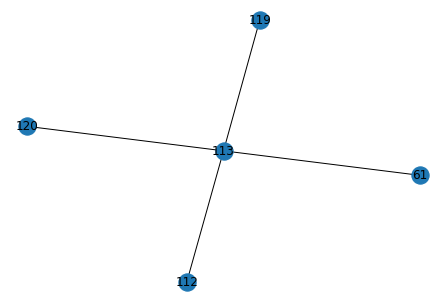

match_branches = [[112, 119]]
edges_to_delete (resolve crossover) = [[61, 112], [61, 113], [61, 119], [61, 120], [112, 113], [112, 120], [113, 119], [113, 120], [119, 120]]
edges_to_create (resolve crossover) = [[112, 119]]
curr_limb.deleted_edges 5 =[[3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [51, 73], [51, 82], [73, 81], [81, 82], [49, 52], [49, 61], [49, 63], [52, 61], [61, 63], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [3, 57], [3, 76], [3, 79], [57, 79], [76, 79], [51, 73], [51, 82], [73, 81], [81, 82], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], [81, 94], [81, 95], [92, 94], [92, 95], [9, 66], [9, 85], [9, 92], [9, 94], [66, 85], [66, 92], [66, 94], [66, 99], [85, 94], [85, 99], [92, 94], [92, 99], [94, 99], [44, 46], [44, 58], [44, 69], [46, 58], [46, 69], [75, 79], [75, 89], [79, 88], [79, 89], [88, 89], array([58, 65]), array([64, 65]), array([74, 84]), array([ 74, 100]), array([ 84, 100])]
skip_nodes = []
edg

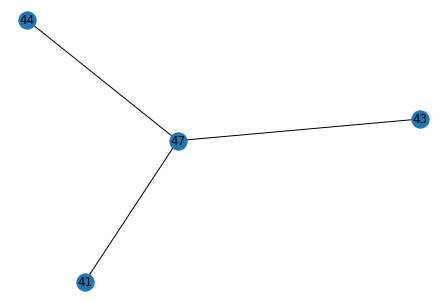

match_branches = [[41, 44], [43, 47]]
edges_to_delete (resolve crossover) = [[41, 43], [41, 47], [43, 44], [44, 47]]
edges_to_create (resolve crossover) = [[41, 44], [43, 47]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 47 because skeletal distance was 2062.8092837841264 and threshold was 2500
skip_nodes = [47]
edges_to_delete (cut_limb_network) = [[41, 43], [41, 47], [43, 44], [44, 47]]
edges_to_create = [[41, 44], [43, 47]]
Number of connected components = 3
Comp 0 = {35, 36, 38, 39, 40, 42, 43, 47, 21, 29}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 37, 41, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}
Comp 2 = {60}
curr_limb_copy.deleted_edges = [[41, 43], [41, 47], [43, 44], [44, 47]]
curr_limb_copy.created_edges = [[41, 44], [43, 47]]
After get best cut: cut_edges = [[41, 43], [41, 47], [43, 44], [44, 47]], added_edges = [[41, 44], [43, 47]]
total_soma_paths_to_cut = []
------

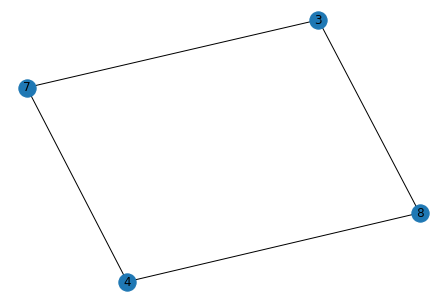

match_branches = [[4, 8]]
edges_to_delete (resolve crossover) = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
edges_to_create (resolve crossover) = [[4, 8]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
edges_to_create = [[4, 8]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4.0, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 1 = {7}
Comp 2 = {5}
curr_limb_copy.deleted_edges = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
curr_limb_copy.created_edges = [[4, 8]]
After get best cut: cut_edges = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]], added_edges = [[4, 8]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
Shortest path =

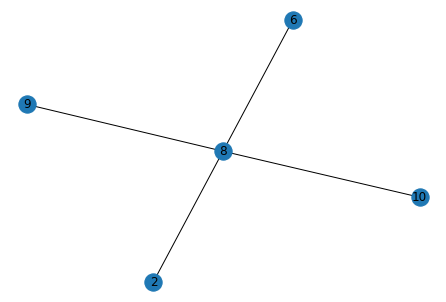

match_branches = [[6, 10], [2, 9]]
edges_to_delete (resolve crossover) = [[2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]]
edges_to_create (resolve crossover) = [[6, 10], [2, 9]]
curr_limb.deleted_edges 5 =[[3, 4], [3, 7], [3, 8], [4, 7], [7, 8]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]]
edges_to_create = [[6, 10], [2, 9]]
Number of connected components = 5
Comp 0 = {8, 1, 3, 4.0}
Comp 1 = {7}
Comp 2 = {2, 37, 38, 9, 13, 14}
Comp 3 = {0, 6, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 4 = {5}
curr_limb_copy.deleted_edges = [[3, 4], [3, 7], [3, 8], [4, 7], [7, 8], [2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]]
curr_limb_copy.created_edges = [[4, 8], [6, 10], [2, 9]]
After get best cut: cut_edges = [[2, 6], [2, 8], [2, 10], [6, 8], [6, 9], [8, 9], [8, 10], [9, 10]], added_ed

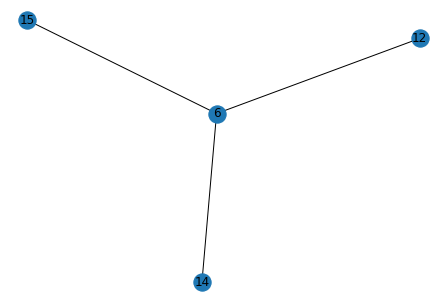

match_branches = [[12, 14], [6, 15]]
edges_to_delete (resolve crossover) = [[6, 12], [6, 14], [12, 15], [14, 15]]
edges_to_create (resolve crossover) = [[12, 14], [6, 15]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 0 because skeletal distance was 123.6292000672982 and threshold was 2500
skip_nodes = [0]
edges_to_delete (cut_limb_network) = [[6, 12], [6, 14], [12, 15], [14, 15]]
edges_to_create = [[12, 14], [6, 15]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 15, 16, 17}
Comp 1 = {3, 10, 11, 12, 13, 14}
curr_limb_copy.deleted_edges = [[6, 12], [6, 14], [12, 15], [14, 15]]
curr_limb_copy.created_edges = [[12, 14], [6, 15]]
After get best cut: cut_edges = [[6, 12], [6, 14], [12, 15], [14, 15]], added_edges = [[12, 14], [6, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path

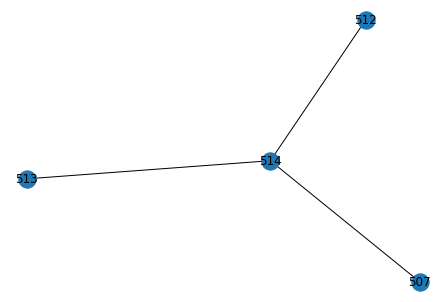

match_branches = [[507, 512]]
edges_to_delete (resolve crossover) = [[507, 513], [507, 514], [512, 513], [512, 514], [513, 514]]
edges_to_create (resolve crossover) = [[507, 512]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[507, 513], [507, 514], [512, 513], [512, 514], [513, 514]]
edges_to_create = [[507, 512]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 

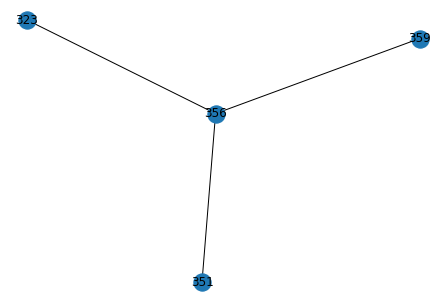

match_branches = [[323, 359], [351, 356]]
edges_to_delete (resolve crossover) = [[323, 351], [323, 356], [351, 359], [356, 359]]
edges_to_create (resolve crossover) = [[323, 359], [351, 356]]
curr_limb.deleted_edges 5 =[[507, 513], [507, 514], [512, 513], [512, 514], [513, 514]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[323, 351], [323, 356], [351, 359], [356, 359]]
edges_to_create = [[323, 359], [351, 356]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 13

  Edge: [6 7]: curr_angle = 10.88
  Edge: [ 7 13]: curr_angle = 108.51
  Edge: [13 14]: curr_angle = 37.59
  Edge: [14 22]: curr_angle = 30.49
  Edge: [22 17]: curr_angle = 51.68
  Edge: [17 15]: curr_angle = 39.64

Total time for doubling_back = 0.32247066497802734
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 7 13] had a doubling back of 108.50669381756478
***inside resolve crossover!!!!****
coordinate_branches = [7, 12, 13]
7 = red
12 = aqua
13 = purple
Angle between 7 and 12 = 92.11 
Angle between 7 and 13 = 119.21 
Angle between 12 and 13 = 49.42 
Final Matches = []
matched_branches_revised = []
Original graph


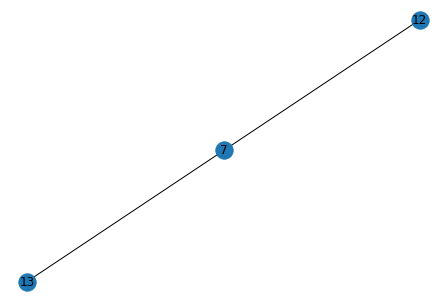

match_branches = []
edges_to_delete (resolve crossover) = [[7, 12], [7, 13], [12, 13]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 7, 12]), array([ 7, 13]), array([12, 13])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
Comp 1 = {8, 6, 7}
Comp 2 = {0, 2, 3, 4, 5, 9, 10, 11, 12}
curr_limb_copy.deleted_edges = [array([ 7, 12]), array([ 7, 13]), array([12, 13])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([ 7, 12]), array([ 7, 13]), array([12, 13])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([ 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,

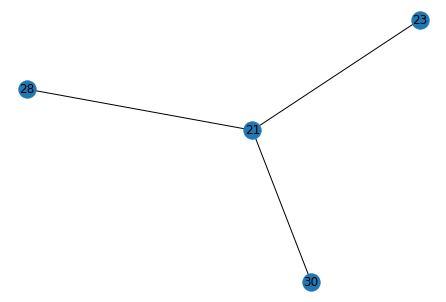

match_branches = [[23, 28]]
edges_to_delete (resolve crossover) = [[21, 23], [21, 28], [21, 30], [23, 30], [28, 30]]
edges_to_create (resolve crossover) = [[23, 28]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 35 because skeletal distance was 1957.8257309212988 and threshold was 2500
skip_nodes = [35]
edges_to_delete (cut_limb_network) = [[21, 23], [21, 28], [21, 30], [23, 30], [28, 30]]
edges_to_create = [[23, 28]]
Number of connected components = 6
Comp 0 = {32, 3, 36, 5, 39, 40, 42, 44, 45, 46, 47, 13, 51, 53, 54, 55, 56, 24, 58, 30}
Comp 1 = {0, 1, 2, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 29, 33, 35, 37, 38, 41, 49, 50, 57, 59, 60, 61}
Comp 2 = {34, 9, 43, 52, 22, 23, 28}
Comp 3 = {27}
Comp 4 = {31}
Comp 5 = {48}
curr_limb_copy.deleted_edges = [[21, 23], [21, 28], [21, 30], [23, 30], [28, 30]]
curr_limb_copy.created_edges = [[23, 28]]
After get best cut: cut_edges = [[21, 23], [21, 28], [21, 30], [23, 30], [28, 30]], added_edges = [[23, 28]]
total_soma_

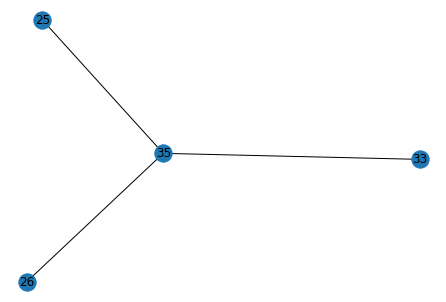

match_branches = [[26, 35]]
edges_to_delete (resolve crossover) = [[25, 26], [25, 33], [25, 35], [26, 33], [33, 35]]
edges_to_create (resolve crossover) = [[26, 35]]
curr_limb.deleted_edges 5 =[[21, 23], [21, 28], [21, 30], [23, 30], [28, 30]]
Skipping endnode 35 because skeletal distance was 1957.8257309212988 and threshold was 2500
skip_nodes = [35]
edges_to_delete (cut_limb_network) = [[25, 26], [25, 33], [25, 35], [26, 33], [33, 35]]
edges_to_create = [[26, 35]]
Number of connected components = 8
Comp 0 = {32, 3, 36, 5, 39, 40, 42, 44, 45, 46, 47, 13, 51, 53, 54, 55, 56, 24, 58, 30}
Comp 1 = {0, 1, 2, 4, 6, 8, 10, 11, 12, 15, 16, 21, 29, 33, 37, 38, 41, 49, 50, 57, 59, 60, 61}
Comp 2 = {34, 9, 43, 52, 22, 23, 28}
Comp 3 = {14, 17, 19, 20, 25}
Comp 4 = {35, 26, 18, 7}
Comp 5 = {27}
Comp 6 = {31}
Comp 7 = {48}
curr_limb_copy.deleted_edges = [[21, 23], [21, 28], [21, 30], [23, 30], [28, 30], [25, 26], [25, 33], [25, 35], [26, 33], [33, 35]]
curr_limb_copy.created_edges = [[23, 28], [2

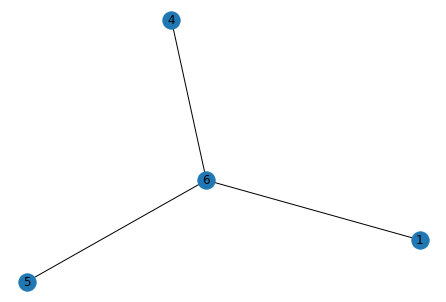

match_branches = [[1, 6], [4, 5]]
edges_to_delete (resolve crossover) = [[1, 4], [1, 5], [4, 6], [5, 6]]
edges_to_create (resolve crossover) = [[1, 6], [4, 5]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 4], [1, 5], [4, 6], [5, 6]]
edges_to_create = [[1, 6], [4, 5]]
Number of connected components = 2
Comp 0 = {3, 4, 5, 14}
Comp 1 = {0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}
curr_limb_copy.deleted_edges = [[1, 4], [1, 5], [4, 6], [5, 6]]
curr_limb_copy.created_edges = [[1, 6], [4, 5]]
After get best cut: cut_edges = [[1, 4], [1, 5], [4, 6], [5, 6]], added_edges = [[1, 6], [4, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connectio

  Edge: [ 7 10]: curr_angle = 55.59
  Edge: [10  2]: curr_angle = 81.88

Total time for doubling_back = 0.2200169563293457

Attempting the width jump check (attempting from both sides)
  Edge: [ 7 10]: jump = -538.25
  Edge: [10  2]: jump = -58.95
Total time for width = 0.07912778854370117
Path starting at 7 had err_edges: []
  Edge: [ 2 10]: jump = 71.12


----- Working on 864691135570745581-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135570745581 = 236.38597989082336 ------


----- Working on 864691135291777462-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = []


 ------ Total time for Splitting 864691135291777462 = 54.197686433792114 ------


----- Working on 864691136577503252-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = [0]


 -------- Working on limb 0---

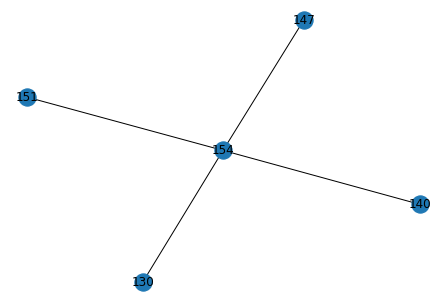

match_branches = [[147, 154]]
edges_to_delete (resolve crossover) = [[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154]]
edges_to_create (resolve crossover) = [[147, 154]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154]]
edges_to_create = [[147, 154]]
Number of connected components = 7
Comp 0 = {0, 3, 5, 7, 8, 9, 10, 11.0, 12, 13, 14, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 104, 105, 106, 107, 109, 110, 111, 116, 118, 119, 122, 123, 126, 127, 128, 129, 132, 133, 134, 136, 137, 138, 139, 142, 143, 144, 145, 147, 148, 149, 154, 155, 156, 157, 

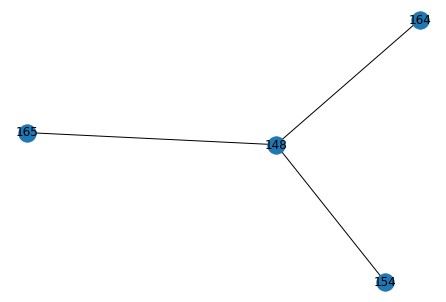

match_branches = [[154, 164], [148, 165]]
edges_to_delete (resolve crossover) = [[148, 154], [148, 164], [154, 165], [164, 165]]
edges_to_create (resolve crossover) = [[154, 164], [148, 165]]
curr_limb.deleted_edges 5 =[[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[148, 154], [148, 164], [154, 165], [164, 165]]
edges_to_create = [[154, 164], [148, 165]]
Number of connected components = 9
Comp 0 = {165, 294, 295, 136, 425, 202, 203, 426, 143, 148}
Comp 1 = {0, 3, 5, 7, 8, 9, 10, 11.0, 12, 13, 14, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 104, 105, 106, 107, 109, 110, 111, 116, 118, 119, 122, 123, 126, 127, 128, 129, 132, 133

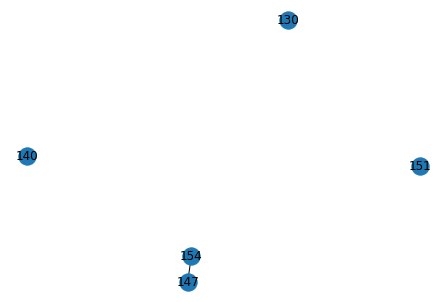

match_branches = [[147, 154]]
edges_to_delete (resolve crossover) = [[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154]]
edges_to_create (resolve crossover) = [[147, 154]]
curr_limb.deleted_edges 5 =[[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154], [148, 154], [148, 164], [154, 165], [164, 165]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154]]
edges_to_create = [[147, 154]]
Number of connected components = 9
Comp 0 = {165, 294, 295, 136, 425, 202, 203, 426, 143, 148}
Comp 1 = {0, 3, 5, 7, 8, 9, 10, 11.0, 12, 13, 14, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89

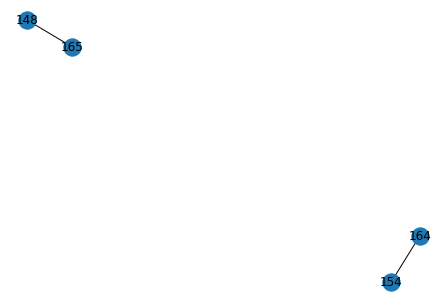

match_branches = [[154, 164], [148, 165]]
edges_to_delete (resolve crossover) = [[148, 154], [148, 164], [154, 165], [164, 165]]
edges_to_create (resolve crossover) = [[154, 164], [148, 165]]
curr_limb.deleted_edges 5 =[[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154], [148, 154], [148, 164], [154, 165], [164, 165], [130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[148, 154], [148, 164], [154, 165], [164, 165]]
edges_to_create = [[154, 164], [148, 165]]
Number of connected components = 9
Comp 0 = {165, 294, 295, 136, 425, 202, 203, 426, 143, 148}
Comp 1 = {0, 3, 5, 7, 8, 9, 10, 11.0, 12, 13, 14, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83

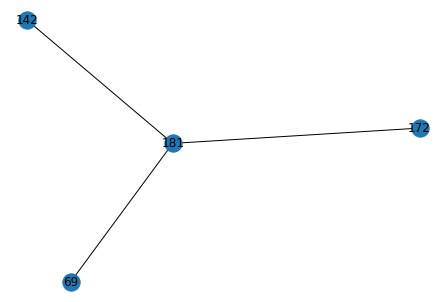

match_branches = [[69, 181], [142, 172]]
edges_to_delete (resolve crossover) = [[69, 142], [69, 172], [142, 181], [172, 181]]
edges_to_create (resolve crossover) = [[69, 181], [142, 172]]
curr_limb.deleted_edges 5 =[[130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154], [148, 154], [148, 164], [154, 165], [164, 165], [130, 140], [130, 147], [130, 151], [130, 154], [140, 147], [140, 151], [140, 154], [147, 151], [151, 154], [148, 154], [148, 164], [154, 165], [164, 165]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[69, 142], [69, 172], [142, 181], [172, 181]]
edges_to_create = [[69, 181], [142, 172]]
Number of connected components = 10
Comp 0 = {165, 294, 295, 136, 425, 202, 203, 426, 143, 148}
Comp 1 = {0, 3, 5, 7, 8, 9, 10, 11.0, 12, 13, 14, 17, 18, 19, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")